<center>
    <img src = "http://www.evanmarie.com/content/files/notebook_images/finance_stocks_banner.png" width = 950>
    </center>

# **Finance and Stocks with Pandas and Python**
### ~ Evan Marie Carr (http://www.EvanMarie.com)
* **[`stockhelpers.py`](https://github.com/EvanMarie/helpers/blob/main/stock_helpers.ipynb)** - custom functions used throughout this project
    > This project is fairly long and covers a lot of ground. So in an effort to allow for the abstraction away of many repetitive functions and operations, I have compiled **[this helper file](https://github.com/EvanMarie/helpers/blob/main/stock_helpers.ipynb)**. For the functions that are necessary in understanding what is happening in the code, I include descriptions of each function as well as a link to the GitHub Gist for each individual function, in the following manner: <br>
    
    > <font size = 3> **🔗 [`stockhelpers.function_name()` - GitHub Gist](https://gist.github.com/EvanMarie/806986d1219bc051cc59bb180d06320a)** </font>
     
    > Other functions are just for the purpose of notebook presentation. The cell below downloads and imports the Python file, but you can investigate the functions on their own as well. All (any function within this notebook preceeded by `h.`, my chosen alias for my helpers import) can be found **[here in one notebook](https://github.com/EvanMarie/helpers/blob/main/stock_helpers.ipynb)** as well.<br>

In [82]:
%%capture
!pip install lxml
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'monospace'
%matplotlib inline
pd.options.display.float_format = '{:,.3f}'.format
from urllib.request import urlretrieve
url = "https://mydatabucky.s3.amazonaws.com/stockhelpers.py"
urlretrieve(url, "stockhelpers.py")
import stockhelpers as h

---
## 🔷 **Importing & Inspecting Dow Jones Index Data from [Wikipedia](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average)**
<center><img src = "http://www.evanmarie.com/content/files/notebook_images/dow_jones_web.png" width = 750></center>

In [2]:
dj_wiki = pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")[1]

dj_wiki = dj_wiki.iloc[:, :5].copy()

dj_wiki.rename(columns = {'Company': 'company', 'Exchange': 'exchange', 'Symbol': 'symbol', 'Industry': 'industry', 'Date added': 'date_added'}, inplace = True)

dj_wiki.date_added = pd.to_datetime(dj_wiki.date_added)

In [3]:
dj_wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   company     30 non-null     object        
 1   exchange    30 non-null     object        
 2   symbol      30 non-null     object        
 3   industry    30 non-null     object        
 4   date_added  30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 1.3+ KB


#### 🔹 **`dj_wiki` - Data downloaded directly from Wikipedia as a Pandas dataframe**

In [4]:
dj_wiki

company exchange symbol                        industry  \
0                         3M     NYSE    MMM                    Conglomerate   
1           American Express     NYSE    AXP              Financial services   
2                      Amgen   NASDAQ   AMGN               Biopharmaceutical   
3                      Apple   NASDAQ   AAPL          Information technology   
4                     Boeing     NYSE     BA           Aerospace and defense   
5                Caterpillar     NYSE    CAT         Construction and Mining   
6                    Chevron     NYSE    CVX              Petroleum industry   
7                      Cisco   NASDAQ   CSCO          Information technology   
8                  Coca-Cola     NYSE     KO                  Drink industry   
9                        Dow     NYSE    DOW               Chemical industry   
10             Goldman Sachs     NYSE     GS              Financial services   
11                Home Depot     NYSE     HD                Home Improvement   
12                 Honeywell   NASDAQ    HON                    Conglomerate   
13                     Intel   NASDAQ   INTC          Semiconductor industry   
14                       IBM     NYSE    IBM          Information technology   
15         Johnson & Johnson     NYSE    JNJ         Pharmaceutical industry   
16            JPMorgan Chase     NYSE    JPM              Financial services   
17                McDonald's     NYSE    MCD                   Food industry   
18                     Merck     NYSE    MRK         Pharmaceutical industry   
19                 Microsoft   NASDAQ   MSFT          Information technology   
20                      Nike     NYSE    NKE               Clothing industry   
21          Procter & Gamble     NYSE     PG      Fast-moving consumer goods   
22                Salesforce     NYSE    CRM          Information technology   
23                 Travelers     NYSE    TRV                       Insurance   
24              UnitedHealth     NYSE    UNH             Managed health care   
25                   Verizon     NYSE     VZ     Telecommunications industry   
26                      Visa     NYSE      V              Financial services   
27  Walgreens Boots Alliance   NASDAQ    WBA                       Retailing   
28                   Walmart     NYSE    WMT                       Retailing   
29       Walt Disney Company     NYSE    DIS  Broadcasting and entertainment   

   date_added  
0  1976-08-09  
1  1982-08-30  
2  2020-08-31  
3  2015-03-19  
4  1987-03-12  
5  1991-05-06  
6  2008-02-19  
7  2009-06-08  
8  1987-03-12  
9  1991-05-06  
10 2019-04-02  
11 1999-11-01  
12 2020-08-31  
13 1999-11-01  
14 1979-06-29  
15 1997-03-17  
16 1991-05-06  
17 1985-10-30  
18 1979-06-29  
19 1999-11-01  
20 2013-09-20  
21 1932-05-26  
22 2020-08-31  
23 2009-06-08  
24 2012-09-24  
25 2004-04-08  
26 2013-09-20  
27 2018-06-26  
28 1997-03-17  
29 1991-05-06

<font size=4><b> **Saving the symbols for the Dow Jones Index Constituents to use with Yahoo Finance later**</b></font>

In [5]:
symbol_list = list(dj_wiki.symbol)

---
## 🔷 **Yahoo Finance Dow Jones Index Download**
### 👉 `dj_yahoo` - Downloading all  Dow Jones Index data available from Yahoo Finance
<font size=4><b> ⚙️ **[yfinance Library](https://algotrading101.com/learn/yfinance-guide/)** </b></font>
<br>

<font size = 3><b> **🔗 [`stockhelpers.display_me()` - GitHub Gist](https://gist.github.com/EvanMarie/fb23288761d2c9ae025bc63be5251729)** </b></font>

In [6]:
dj_yahoo = yf.download("^DJI")

[*********************100%***********************]  1 of 1 completed


In [7]:
h.display_me(dj_yahoo, 5, "Dow Jones Data From Yahoo Finance")

### 🔹 **`dj_data` - Dow Jones Index data, closing values only**
* A closer look at the closing data for the Dow Jones Index

In [8]:
dj_data = dj_yahoo.Close.copy().to_frame()
dj_data.columns = ['close']
dj_data.describe()

close
count  7,806.000
mean  13,599.150
std    8,118.698
min    3,136.600
25%    8,636.363
50%   10,938.350
75%   17,265.795
max   36,799.648


---
## 🔷 **Dow Jones Initial Visualizations**
* The following are data visualizations of the closing values for the Dow Jones Index over the past 30 years
* The first is a look at the entire time range
* Each following visualization corresponds to a time period of drastic fluctuation in the market
<br>

<font size = 3> **🔗 [`stockhelpers.line_graph()` - GitHub Gist](https://gist.github.com/EvanMarie/24c5c597033489a320e63dcec20bb8df)** </font>


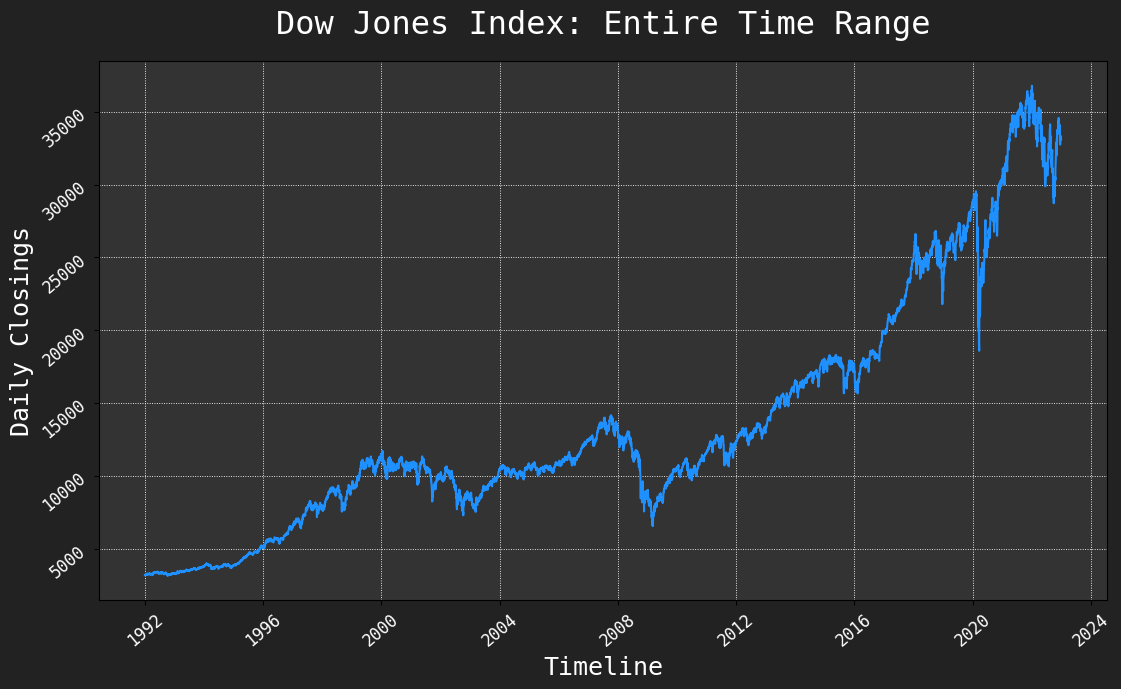

In [9]:
h.line_graph(dj_data, title="Dow Jones Index: Entire Time Range", 
          xlabel = "Timeline", ylabel="Daily Closings")

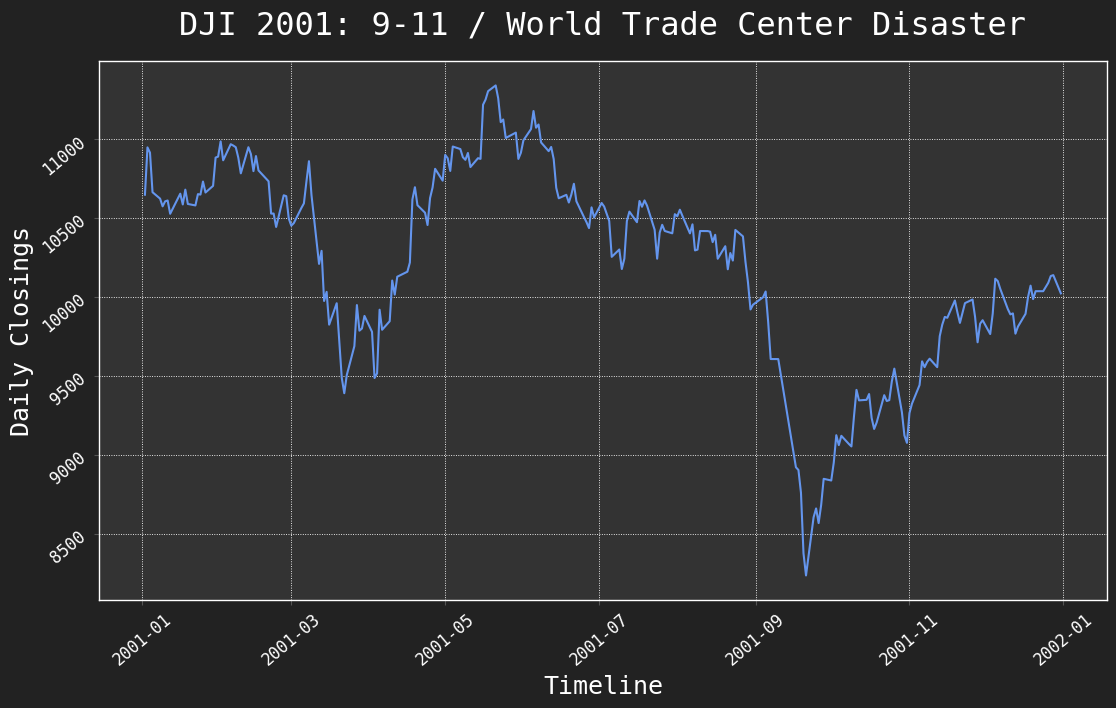

In [10]:
h.line_graph(dj_data, start = '2001', end = '2001', 
             title="DJI 2001: 9-11 / World Trade Center Disaster", 
             xlabel = "Timeline", ylabel="Daily Closings")

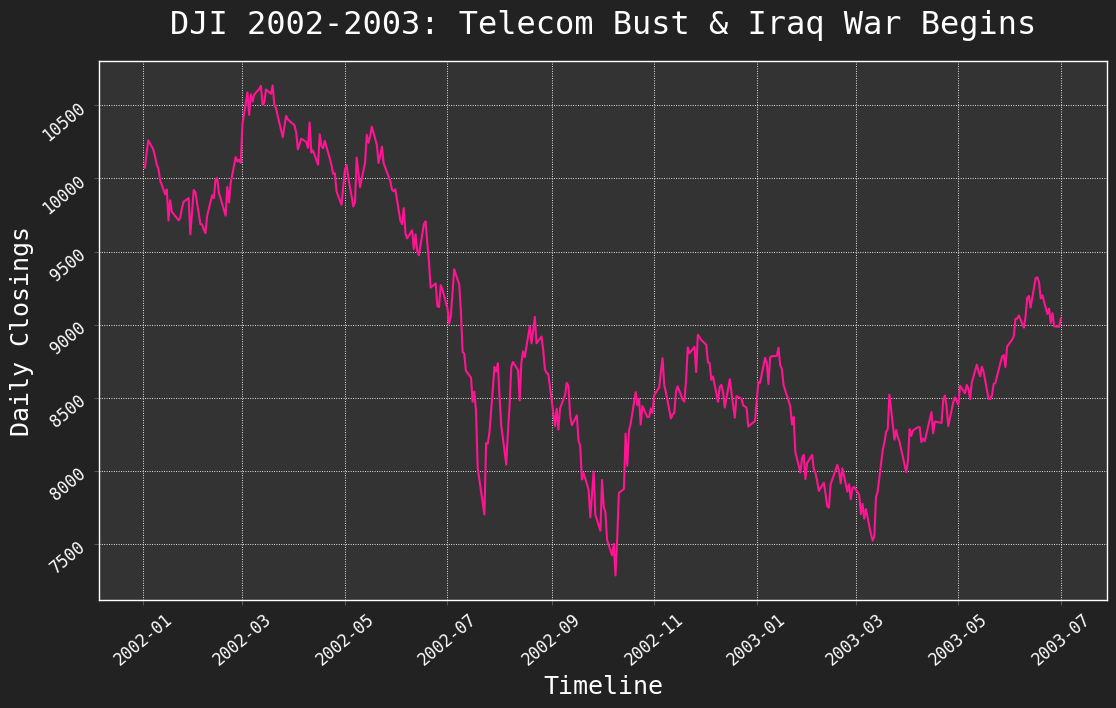

In [11]:
h.line_graph(dj_data, start = '2002', end = '2003-07-01', 
             title="DJI 2002-2003: Telecom Bust & Iraq War Begins", 
              xlabel = "Timeline", ylabel="Daily Closings")

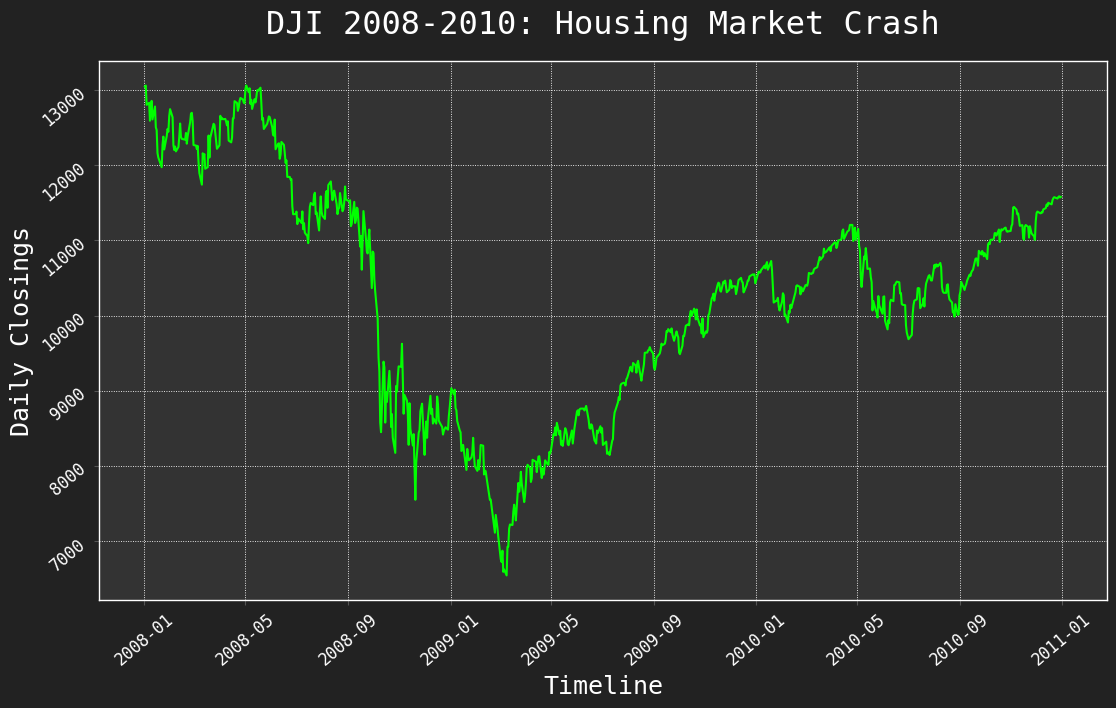

In [12]:
h.line_graph(dj_data, start = '2008', end = '2010',  
             title="DJI 2008-2010: Housing Market Crash", 
              xlabel = "Timeline", ylabel="Daily Closings")

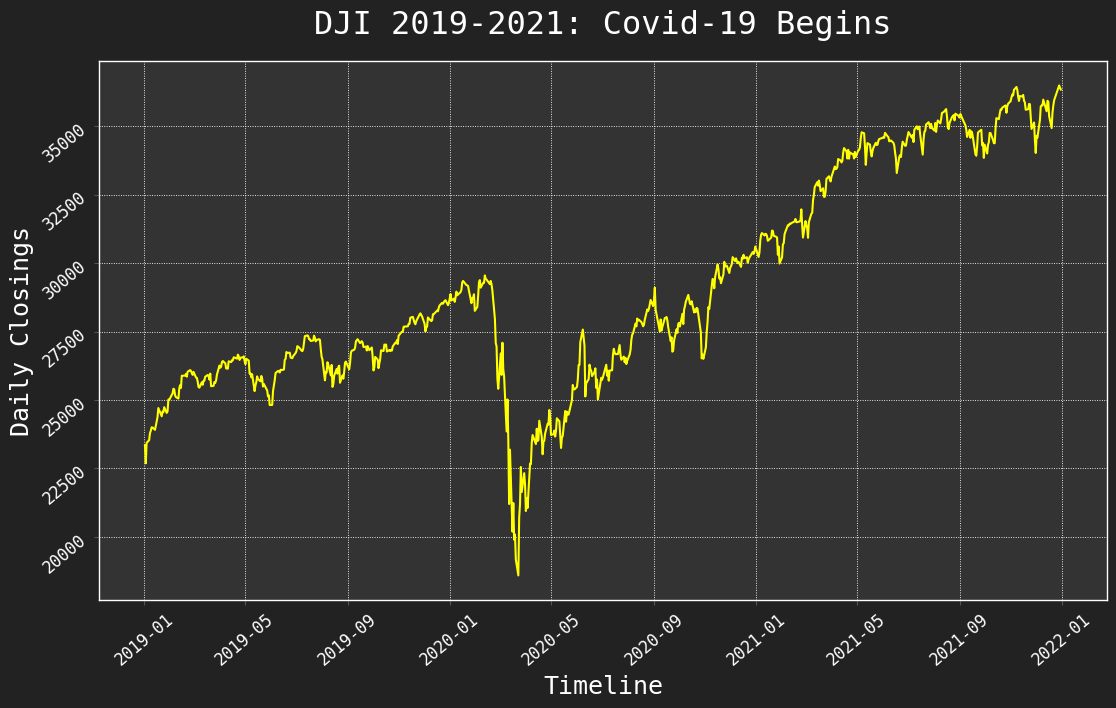

In [13]:
h.line_graph(dj_data, start = '2019', end = '2021',
             title="DJI 2019-2021: Covid-19 Begins", 
              xlabel = "Timeline", ylabel="Daily Closings")

## 🔷 **Adding a `return` column to the Dow Jones data**
* The return column reflects the rate of change each day
* Negative values, or losses, are shown in red
* The highest values in the displayed data are shown in blue

In [14]:
dj_data["return"] = dj_data.pct_change()
dj_data.dropna(inplace = True)
dj_data.columns = ['dj_close', 'dj_return']

In [15]:
h.display_me(dj_data, 5, "Dow Jones Closing and Returns")

<font size=4><b> 🔹 **Dow Jones Index data plotted with the fluctuation in returns**</b></font>

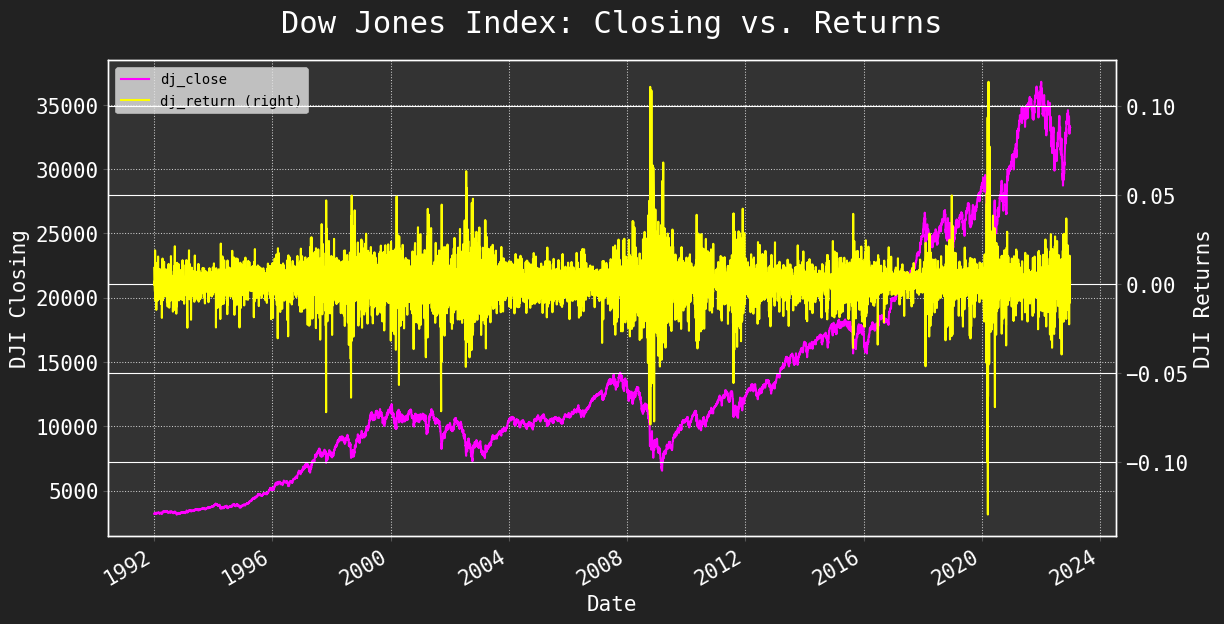

In [16]:
fig = plt.figure(figsize = (13, 7), facecolor = '#222222');
ax = plt.axes()
ax = dj_data.plot(ax = ax, secondary_y = "dj_return", 
               mark_right = True, fontsize = 15, cmap = 'spring',
            title = "Dow Jones Closings and Returns: 1992-2022")
ax.set_facecolor('#333333')
ax.grid(color='white', linestyle=':', linewidth=0.75, alpha = 0.75)
ax.set_xlabel("Date", color = "white", size = 15)
ax.set_ylabel("DJI Closing", color = "white", size = 15)
ax.right_ax.set_ylabel("DJI Returns", color = "white", size = 15)
ax.right_ax.tick_params(labelcolor="white")
ax.tick_params(labelcolor="white")
ax.set_title("Dow Jones Index: Closing vs. Returns", color = "white", size = 22, pad = 20);

---
## 🔷 **Tracking the index:**

<font size = 4><b> **🔹 Results of a simple momentum strategy** </b></font>

<font size = 3><b> 🔗 [`stockhelpers.try_strategy()` - GitHub Gist](https://gist.github.com/EvanMarie/fe75e5c85f1cae52d67ea719e5734a7d) </b></font>

* This function plots the comparison between a strategy and the Dow Jones Index
* The strategy options are: momentum, contrarian, and threshold
* Momentum plots a strategy of holding on days when returns are up from the previous day and selling when returns are down
* Contrarian does the opposite of momentum and sells when returns are up, vice versa when returns are down
* Threshold also takes a `threshold` value, which is the percentage increase in return which will trigger selling
```
def try_strategy(df, return_column="dj_return", close_column="dj_close", 
                 strategy = 'momentum', threshold = None, start = None,
                 end = None)
```
<br>

<font size = 3><b> **🔗 [`stockhelpers.annualized_data()` - GitHub Gist](https://gist.github.com/EvanMarie/1bbc97c835b1f474cf7328fcf9dfc39a)** </b></font>
```
def annualized_data(returns):
    annualized = returns.agg(['mean', 'std']).T
    annualized['return'] = annualized["mean"] * 250
    annualized['risk'] = annualized['std'] * np.sqrt(250)
    annualized.drop(columns = ['mean', 'std'], inplace = True)
```
<br>

return  risk
dj_return         0.091 0.177
strategy_return  -0.049 0.177

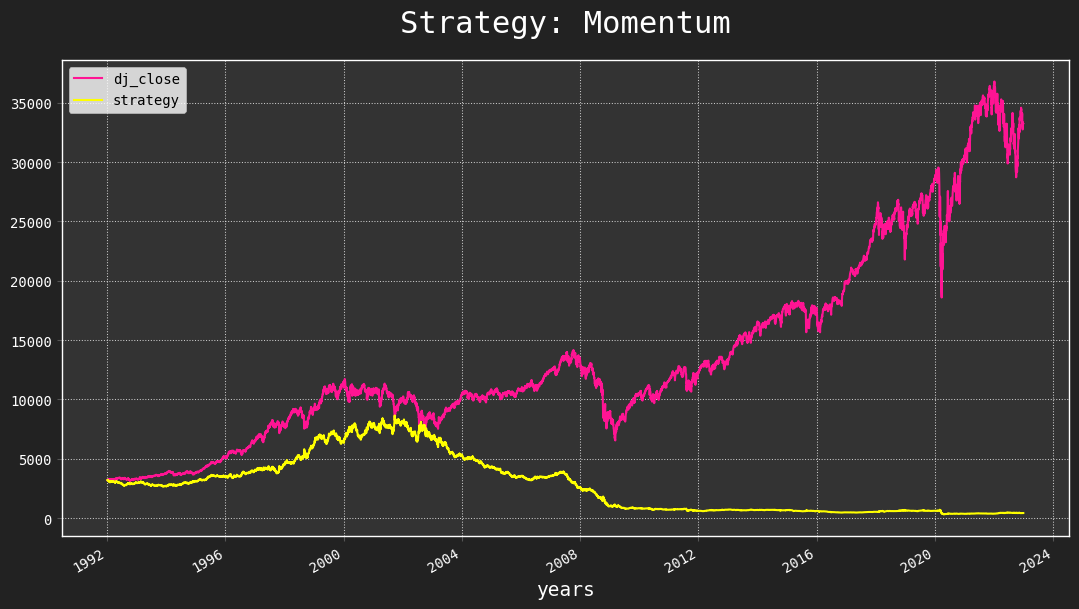

In [17]:
momentum_dj_data = h.try_strategy(dj_data.copy(), strategy="momentum")

<br>

<font size = 4><b>**🔹 Results of a simple contrarian strategy**</b></font>

return  risk
dj_return         0.091 0.177
strategy_return   0.049 0.177

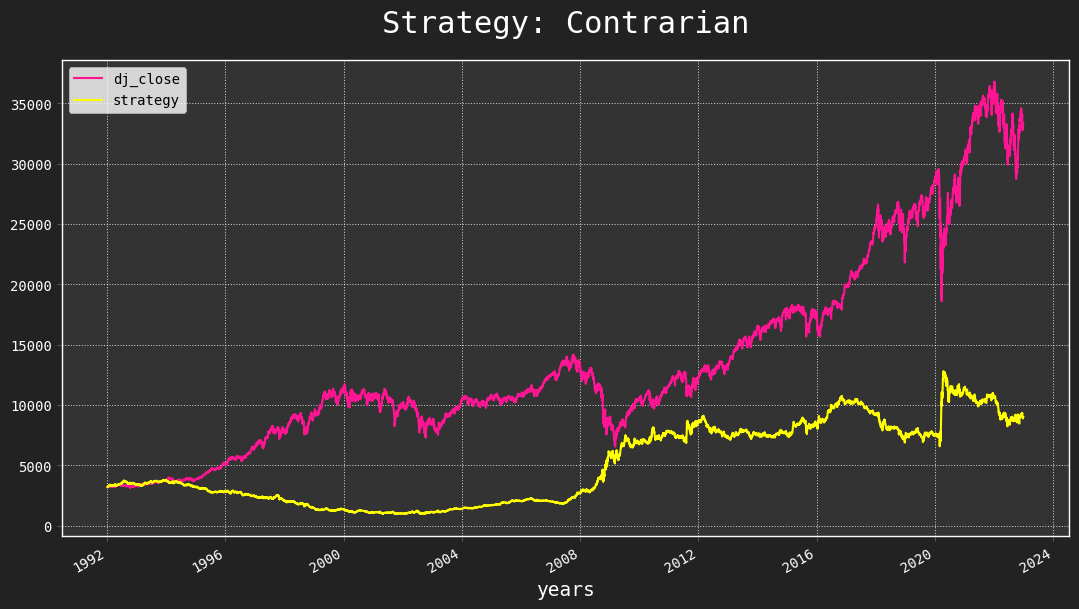

In [18]:
contrarian_dj_data = h.try_strategy(dj_data.copy(), strategy="contrarian")

### 🔹 **Simple strategy of selling if returns are greater than 1%**
* Looking more closely at the data from above for 1%
* Getting the annualized data for this strategy

In [19]:
threshold_dj_data = dj_data.copy()
threshold_dj_data["position"] = np.where(threshold_dj_data['dj_return'] > 1, -1, 1)
threshold_dj_data["strategy_return"] = threshold_dj_data["position"].shift() * dj_data['dj_return']
threshold_dj_data['strategy'] = (threshold_dj_data.strategy_return.add(1,
                                            fill_value = 0).cumprod() * \
                                            dj_data.iloc[0, 0])

return  risk
dj_return         0.091 0.177
strategy_return   0.124 0.177

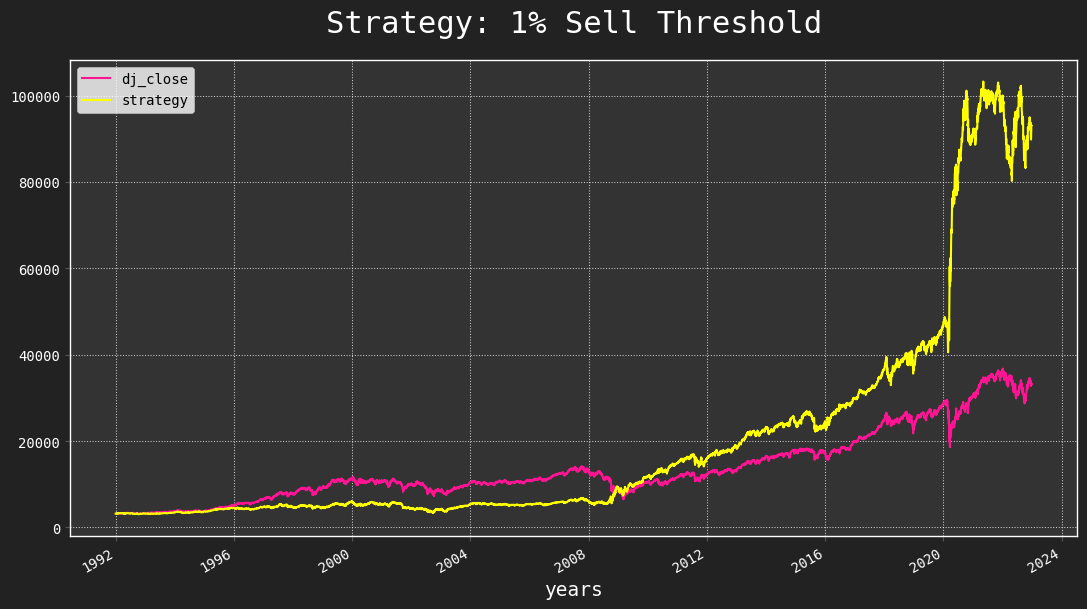

In [20]:
threshold_1pct_dj_data = h.try_strategy(dj_data.copy(), strategy="threshold",
                                       threshold = 0.01)

<font size = 3><b> **🔗 [`stockhelpers.plot_threshold_strategies()` - GitHub Gist](https://gist.github.com/EvanMarie/f21c0d3bbde77db3673d8c14594ca7ee)** </b></font>
* This function will plot the threshold strategy for a sequence of thresholds
```
plot_threshold_strategies(df, start_threshold=0.00, return_column='dj_return', 
                  close_column='dj_close', increase_increment=0.01, 
                  iterations=10, start = None, end = None)
```

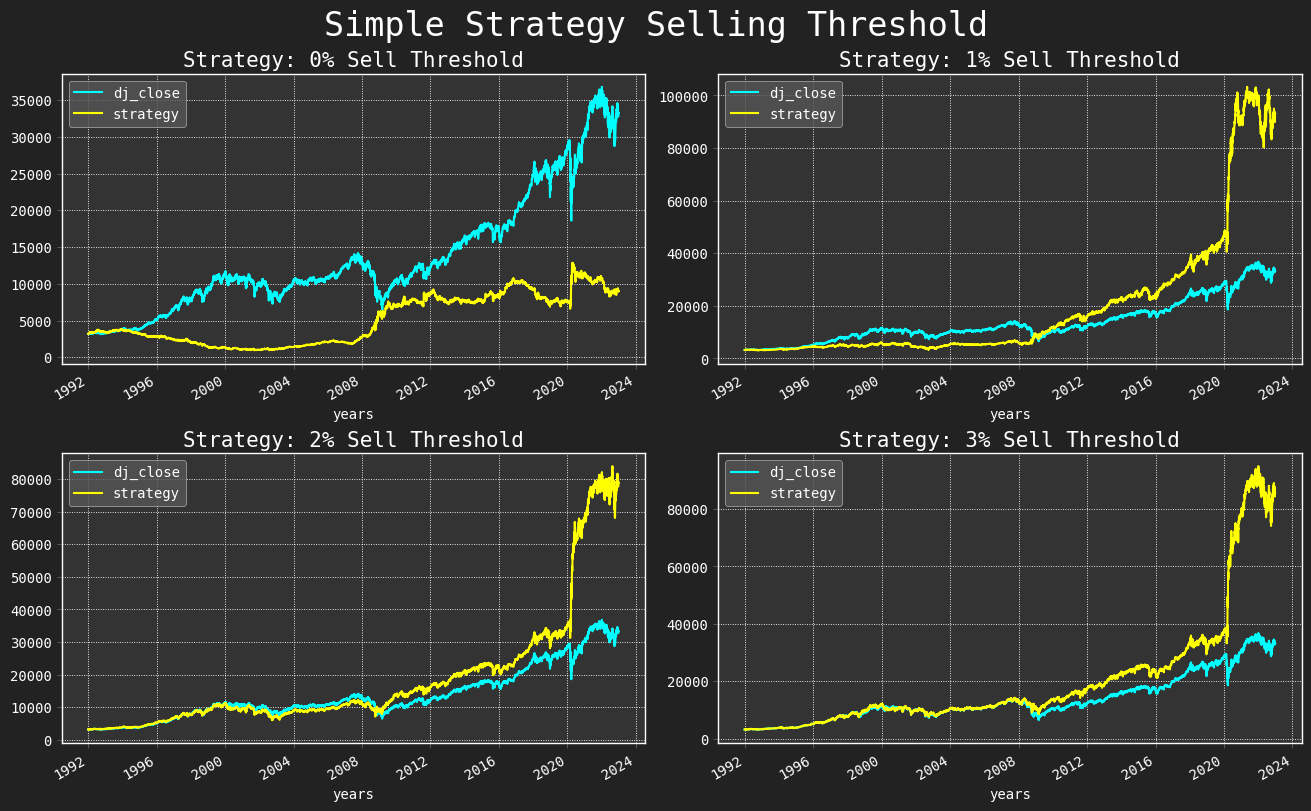

In [21]:
results_log = h.plot_threshold_strategies(dj_data.copy(), iterations = 4)

---
## 🔷 **Simple Moving Averages**
* Investigating the differences in various moving averages and how they compare to the daily fluctuations of the index

In [22]:
rolling_50 = dj_data.dj_close.rolling(window = 50).mean()
print("Past 50 day averages for first examples where it can be calculated:")
display(rolling_50.iloc[50:56])
print("")
print("Past 50 day averages for last 5 days in the data:")
display(rolling_50.tail(5))

Past 50 day averages for first examples where it can be calculated:


Date
1992-03-16   3,242.850
1992-03-17   3,243.968
1992-03-18   3,244.958
1992-03-19   3,246.108
1992-03-20   3,247.446
1992-03-23   3,248.898
Name: dj_close, dtype: float64


Past 50 day averages for last 5 days in the data:


Date
2022-12-20   32,725.760
2022-12-21   32,808.505
2022-12-22   32,884.838
2022-12-23   32,948.142
2022-12-27   33,020.277
Name: dj_close, dtype: float64

<font size = 3><b> **🔗 [`stockhelpers.rolling_average()` - GitHub Gist](https://gist.github.com/EvanMarie/c34f81c863a1da95f18e003c8ad39a59)** </b></font>
* plots the given window for a rolling average against the Dow Jones Index
```
def rolling_average(df, close_column='dj_close', window=50,
                    start=None, end=None, legend_loc = 2)
```

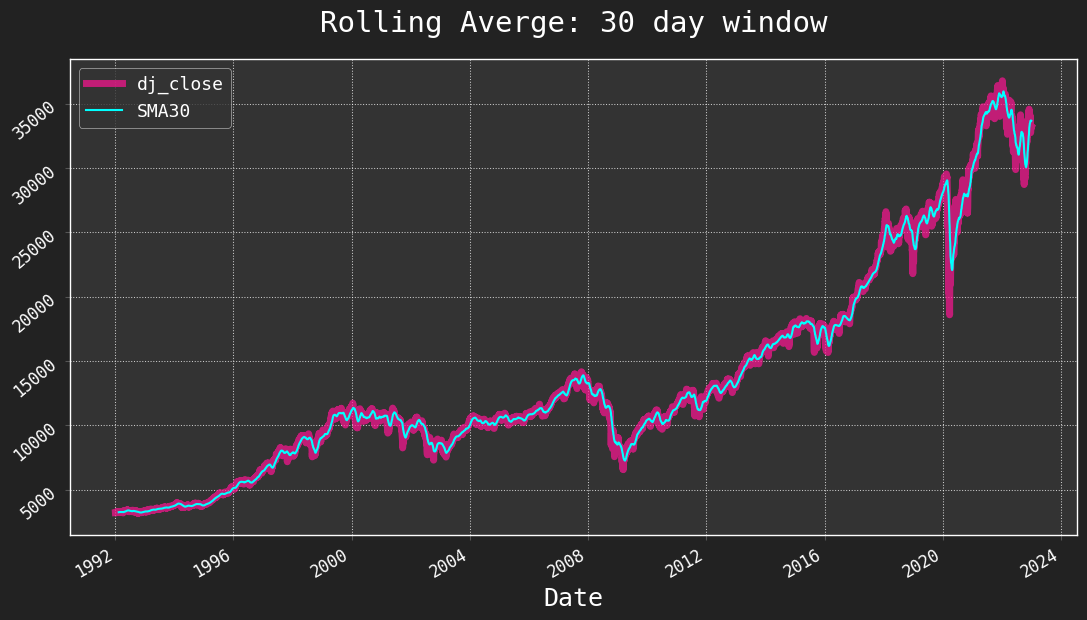

In [23]:
h.rolling_average(dj_data.copy(), window = 30)

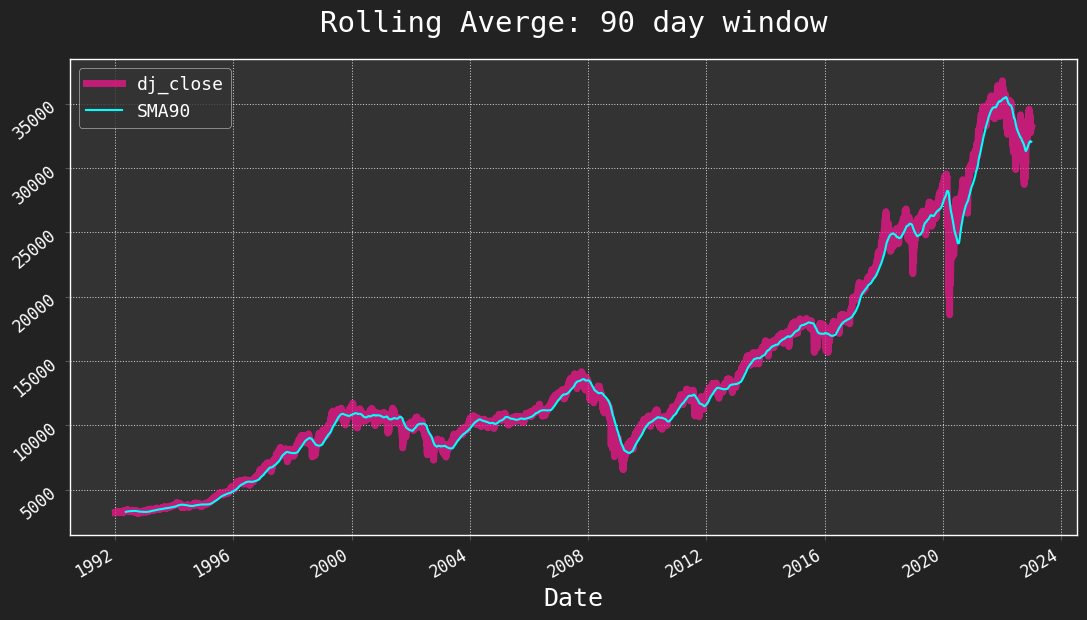

In [24]:
h.rolling_average(dj_data.copy(), window = 90)

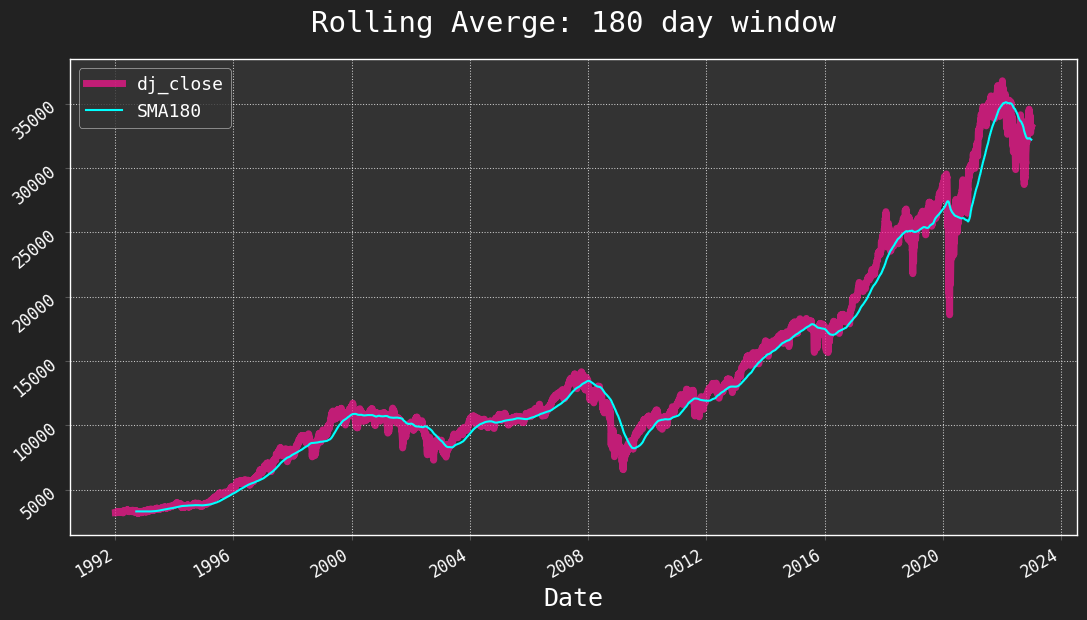

In [25]:
h.rolling_average(dj_data.copy(), window = 180)

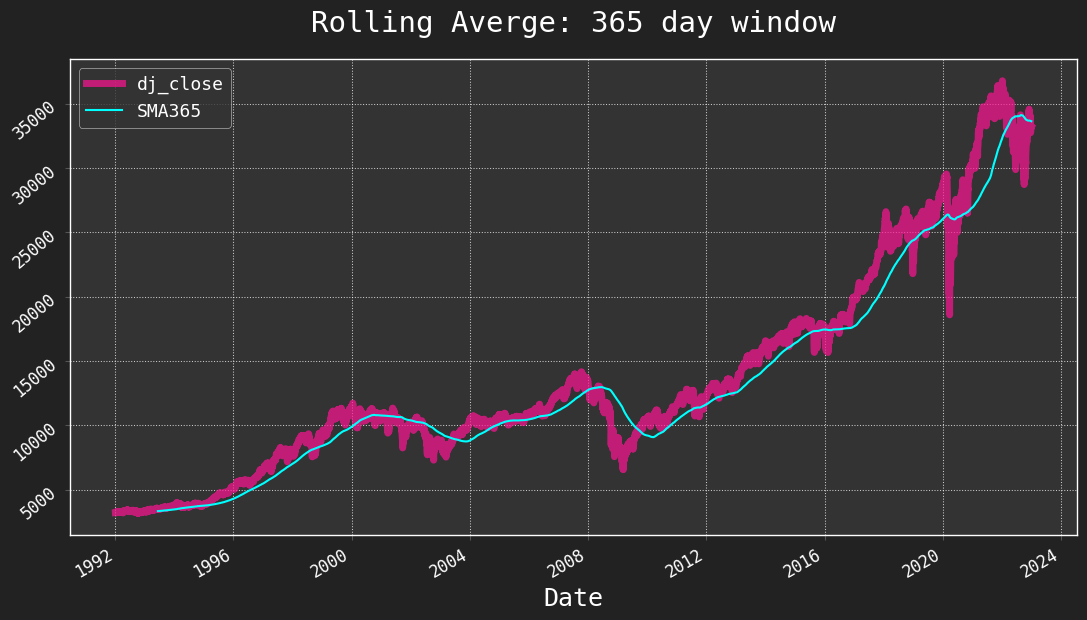

In [26]:
h.rolling_average(dj_data.copy(), window = 365)

<font size = 3><b> **🔗 [`stockhelpers.multiple_rolling_averages()` - GitHub Gist](https://gist.github.com/EvanMarie/2ee7091aa275d6162d4b910d7e797f5e)** </b></font>

* plots multiple rolling averages, as passed as a `window_list` of rolling averages
```
def multiple_rolling_averages(df, close_column='dj_close', 
                              window_list=[50], start=None,
                              end=None, legend_loc = 2)
```

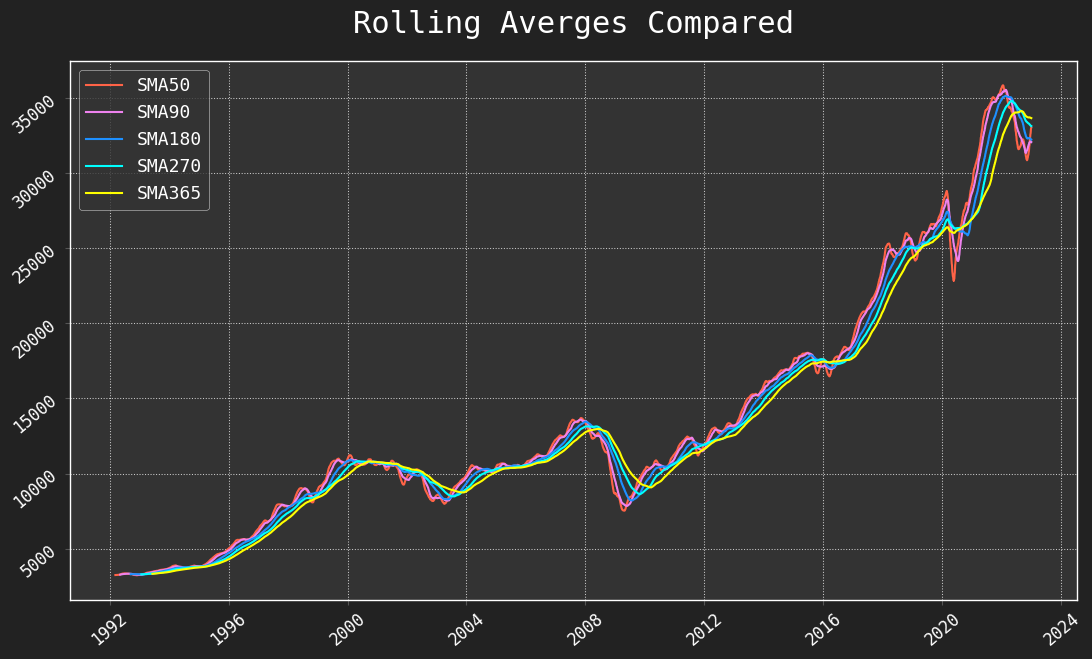

In [27]:
h.multiple_rolling_averages(dj_data.copy(), close_column='dj_close', 
                            window_list=[50, 90, 180, 270, 365])

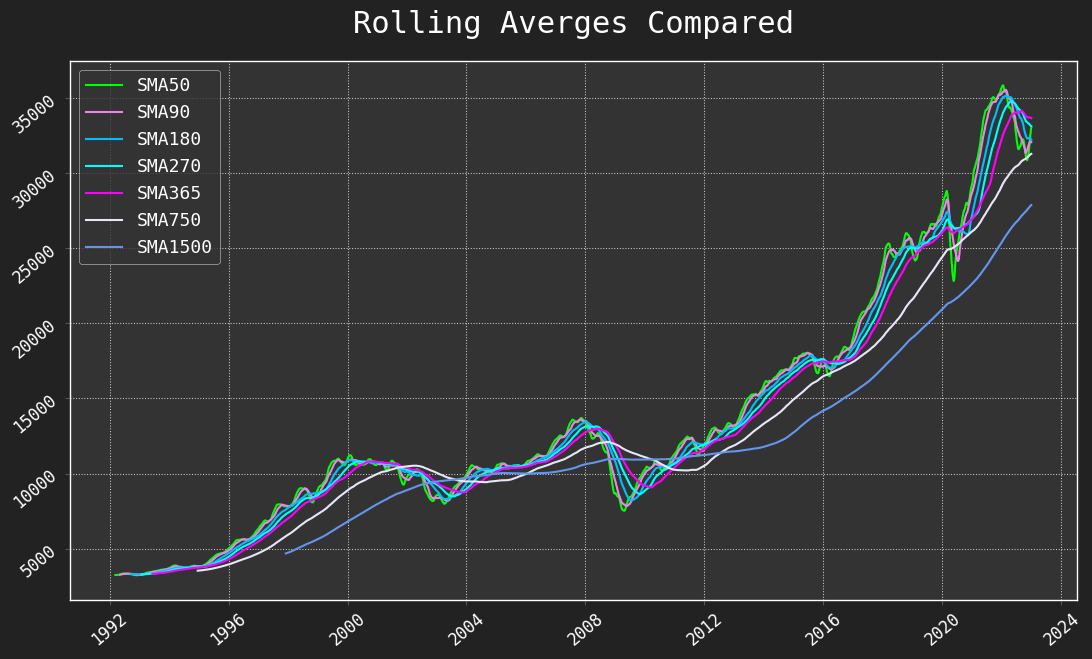

In [28]:
h.multiple_rolling_averages(dj_data.copy(), close_column='dj_close',
                            window_list=[50, 90, 180, 270, 365, 750, 1500])

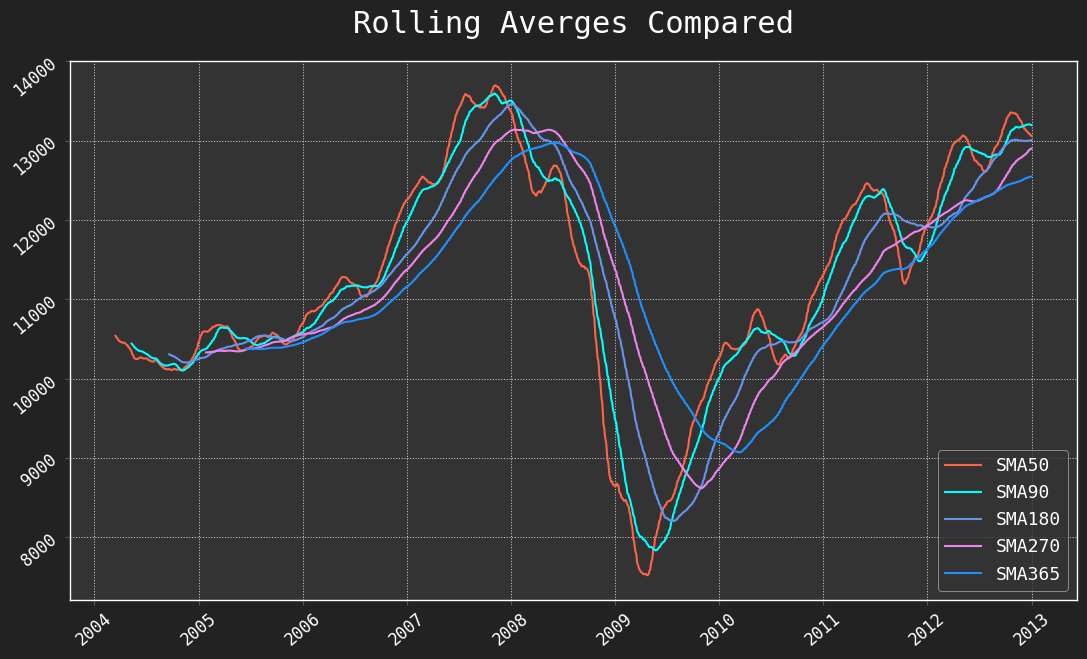

In [29]:
h.multiple_rolling_averages(dj_data.copy(), close_column='dj_close', 
                            window_list=[50, 90, 180, 270, 365],
                           start = "2004", end = "2012", legend_loc = 4)

---
## 🔷 **Yahoo Finance Dow Jones Index Constituent Prices Download**
### 👉 **`prices_all` - Downloading all data available for all DJI Members from Yahoo Finance**
* `yf.download()` is taking the symbol list saved earlier from the Wikipedia data for the Dow Jones Index and downloading all available data for the 30 current Dow Jones Index constituents

In [30]:
prices_all = yf.download(symbol_list)

[*********************100%***********************]  30 of 30 completed


<font size = 3><b> **🔗 [`stockhelpers.rows_cols()` - GitHub Gist](https://gist.github.com/EvanMarie/8c51a923bf5d6d8fc4658e147cc19e73)** </b></font>

In [31]:
h.rows_cols(prices_all, 'prices_all')

In [32]:
h.display_me(prices_all, 5, "All DJI Members' Price History")

#### 👉 **`prices` - Retrieving only the closing data for each day**



In [33]:
prices = prices_all.loc[:,"Close"].copy()

<font size = 3><b> **🔗 [`stockhelpers.print_date_range()` - GitHub Gist](https://gist.github.com/EvanMarie/8c3734a58286f1abbcebce1147f8d295)** </b></font>

In [34]:
h.rows_cols(prices, "Constituent Prices")
h.print_date_range(prices, "Constituent Prices")
h.rows_cols(dj_data, 'Dow Jones Index')
h.print_date_range(dj_data, 'Dow Jones Index')

---
## 🔷 **`all_stocks` - Combining Dow Jones Index and Stock Constituents**

In [35]:
df = pd.concat([prices, dj_data], axis = 1)
df.rename(columns = {"dj_close": "DJI"}, inplace=True)
all_stocks = df.copy().drop(columns = ['dj_return'])

In [36]:
h.display_me(all_stocks, 5, "Concatenated Data")

### 🔹 **`company_data` - Extracting company names to add to data columns labels**

In [37]:
company_data = pd.read_html("https://stockmarketmba.com/stocksinthedjia.php")[0][['Symbol', 'Description']].dropna()

In [38]:
company_data.sample(5)

Symbol                  Description
19    HON  Honeywell International Inc
13   MSFT               Microsoft Corp
11    NKE             Nike Inc Class B
10    MMM                           3M
1       V             Visa Inc Class A

<font size = 4>**👉 Cleaning up the lengthy company names**</font>

In [39]:
company_data.iloc[0].Description = "Walgreens"
company_data.iloc[1].Description = "Visa"
company_data.iloc[2].Description = "Salesforce.com"
company_data.iloc[3].Description = "Chevron"
company_data.iloc[4].Description = "Proctor&Gamble"
company_data.iloc[5].Description = "Verizon"
company_data.iloc[6].Description = "Walmart"
company_data.iloc[7].Description = "UnitedHealth"
company_data.iloc[8].Description = "Travelers"
company_data.iloc[9].Description = "McDonald's"
company_data.iloc[11].Description = "Nike"
company_data.iloc[12].Description = "Merck"
company_data.iloc[13].Description = "Microsoft"
company_data.iloc[14].Description = "JPMorganChase"
company_data.iloc[16].Description = "Johnson&Johnson"
company_data.iloc[17].Description = "GoldmanSachs"
company_data.iloc[18].Description = "HomeDepot"
company_data.iloc[19].Description = "Honeywell"
company_data.iloc[20].Description = "IBM"
company_data.iloc[21].Description = "Intel"
company_data.iloc[22].Description = "Disney"
company_data.iloc[23].Description = "Caterpillar"
company_data.iloc[24].Description = "Cisco"
company_data.iloc[25].Description = "Amex"
company_data.iloc[27].Description = "Amgen"
company_data.iloc[28].Description = "Apple"
company_data.iloc[29].Description = "Dow"

<font size = 4> 👉 **Organizing the company name labels to add to data**</font>

In [40]:
companies = list(company_data.sort_values(by = "Symbol").Description)
symbols = list(company_data.sort_values(by = "Symbol").Symbol)
company_info = zip(companies, symbols)

company_labels = []
for i in company_info:
    company_item = i[1] + " (" + i[0] + ")"
    company_labels.append(company_item)

In [41]:
company_labels = company_labels + ['DJI']
all_stocks.columns = company_labels

In [42]:
all_stocks

AAPL (Apple)  AMGN (Amgen)  AXP (Amex)  BA (Boeing)  \
Date                                                              
1962-01-02           NaN           NaN         NaN        0.823   
1962-01-03           NaN           NaN         NaN        0.840   
1962-01-04           NaN           NaN         NaN        0.831   
1962-01-05           NaN           NaN         NaN        0.815   
1962-01-08           NaN           NaN         NaN        0.817   
...                  ...           ...         ...          ...   
2022-12-20       132.300       264.750     145.700      188.290   
2022-12-21       135.450       266.260     147.100      196.000   
2022-12-22       132.230       265.260     145.310      188.250   
2022-12-23       131.860       263.920     147.020      189.060   
2022-12-27       130.030       263.390     146.390      189.400   

            CAT (Caterpillar)  CRM (Salesforce.com)  CSCO (Cisco)  \
Date                                                                
1962-01-02              1.604                   NaN           NaN   
1962-01-03              1.620                   NaN           NaN   
1962-01-04              1.661                   NaN           NaN   
1962-01-05              1.677                   NaN           NaN   
1962-01-08              1.688                   NaN           NaN   
...                       ...                   ...           ...   
2022-12-20            235.140               128.450        47.370   
2022-12-21            241.730               130.300        47.660   
2022-12-22            237.540               129.190        47.320   
2022-12-23            239.870               129.440        47.480   
2022-12-27            243.140               130.660        47.530   

            CVX (Chevron)  DIS (Disney)  DOW (Dow)  ...  MSFT (Microsoft)  \
Date                                                ...                     
1962-01-02          3.296         0.093        NaN  ...               NaN   
1962-01-03          3.289         0.094        NaN  ...               NaN   
1962-01-04          3.259         0.094        NaN  ...               NaN   
1962-01-05          3.177         0.094        NaN  ...               NaN   
1962-01-08          3.162         0.094        NaN  ...               NaN   
...                   ...           ...        ...  ...               ...   
2022-12-20        172.670        87.020     49.660  ...           241.800   
2022-12-21        174.700        86.920     50.670  ...           244.430   
2022-12-22        172.080        86.670     50.170  ...           238.190   
2022-12-23        177.400        88.010     50.860  ...           238.730   
2022-12-27        179.630        86.370     51.190  ...           236.960   

            NKE (Nike)  PG (Proctor&Gamble)  TRV (Travelers)  \
Date                                                           
1962-01-02         NaN                1.430              NaN   
1962-01-03         NaN                1.414              NaN   
1962-01-04         NaN                1.391              NaN   
1962-01-05         NaN                1.381              NaN   
1962-01-08         NaN                1.344              NaN   
...                ...                  ...              ...   
2022-12-20     103.210              150.460          185.790   
2022-12-21     115.780              151.840          189.420   
2022-12-22     116.710              152.190          187.200   
2022-12-23     116.250              152.620          189.480   
2022-12-27     117.560              153.950          190.480   

            UNH (UnitedHealth)  V (Visa)  VZ (Verizon)  WBA (Walgreens)  \
Date                                                                      
1962-01-02                 NaN       NaN           NaN              NaN   
1962-01-03                 NaN       NaN           NaN              NaN   
1962-01-04                 NaN       NaN           NaN              NaN   
1962-01-05                 NaN  

### 🔹 **`constituent_daily_returns` - Daily returns for all constituents of DJI**

In [43]:
constituent_daily_returns = all_stocks.copy().pct_change()
h.display_me(constituent_daily_returns, 5, title="Daily Returns for All Constituents")

### 🔹 **Annualized returns and risk for all constituents**

In [44]:
constituents_annualized = h.annualized_data(constituent_daily_returns.drop(columns = ['DJI']), title="DJI Constituent Returns")

return  risk
AAPL (Apple)            0.265 0.447
AMGN (Amgen)            0.239 0.382
AXP (Amex)              0.133 0.349
BA (Boeing)             0.146 0.339
CAT (Caterpillar)       0.125 0.295
CRM (Salesforce.com)    0.274 0.426
CSCO (Cisco)            0.274 0.401
CVX (Chevron)           0.098 0.257
DIS (Disney)            0.161 0.315
DOW (Dow)               0.093 0.412
GS (GoldmanSachs)       0.134 0.369
HD (HomeDepot)          0.290 0.368
HON (Honeywell)         0.095 0.292
IBM (IBM)               0.080 0.252
INTC (Intel)            0.180 0.396
JNJ (Johnson&Johnson)   0.135 0.230
JPM (JPMorganChase)     0.139 0.357
KO (Coca-Cola)          0.116 0.231
MCD (McDonald's)        0.167 0.293
MMM (3M)                0.082 0.231
MRK (Merck)             0.123 0.248
MSFT (Microsoft)        0.268 0.338
NKE (Nike)              0.211 0.342
PG (Proctor&Gamble)     0.099 0.214
TRV (Travelers)         0.104 0.274
UNH (UnitedHealth)      0.294 0.400
V (Visa)                0.225 0.300
VZ (Verizon)            0.069 0.238
WBA (Walgreens)         0.162 0.287
WMT (Walmart)           0.195 0.295

<font size = 3><b> **🔗 [`stockhelpers.fancy_plot()` - GitHub Gist](https://gist.github.com/EvanMarie/229932cc7ec71a8f9a9900952058b05c)** </b></font>

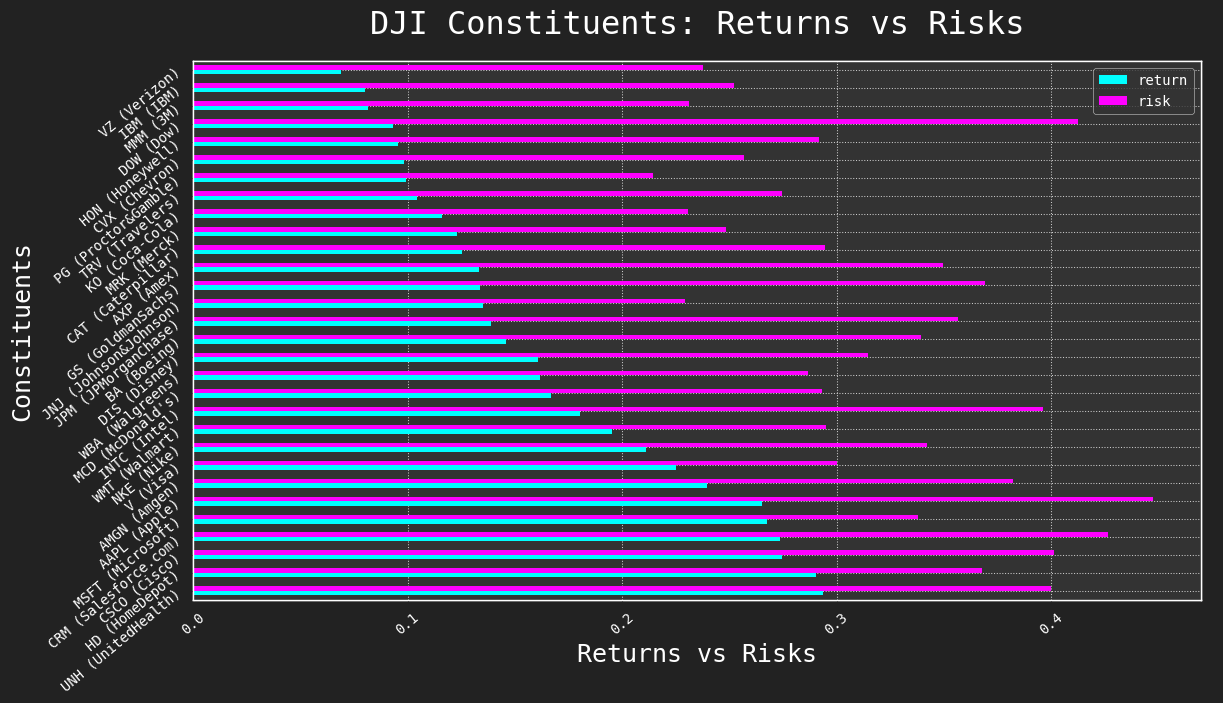

In [45]:
h.fancy_plot(constituents_annualized.sort_values(by = "return", ascending = False), 
           kind = "barh", legend_loc = 1, xlabel = 'Returns vs Risks', cmap = 'cool',
           ylabel = "Constituents", title = "DJI Constituents: Returns vs Risks")

### 🔹 **Correlation heatmap between constituents**
<font size = 3><b> **🔗 [`stockhelpers.correlation_heatmap()` - GitHub Gist](https://gist.github.com/EvanMarie/9e9503bc3cd2fb500d926b107e00b98f)** </b></font>

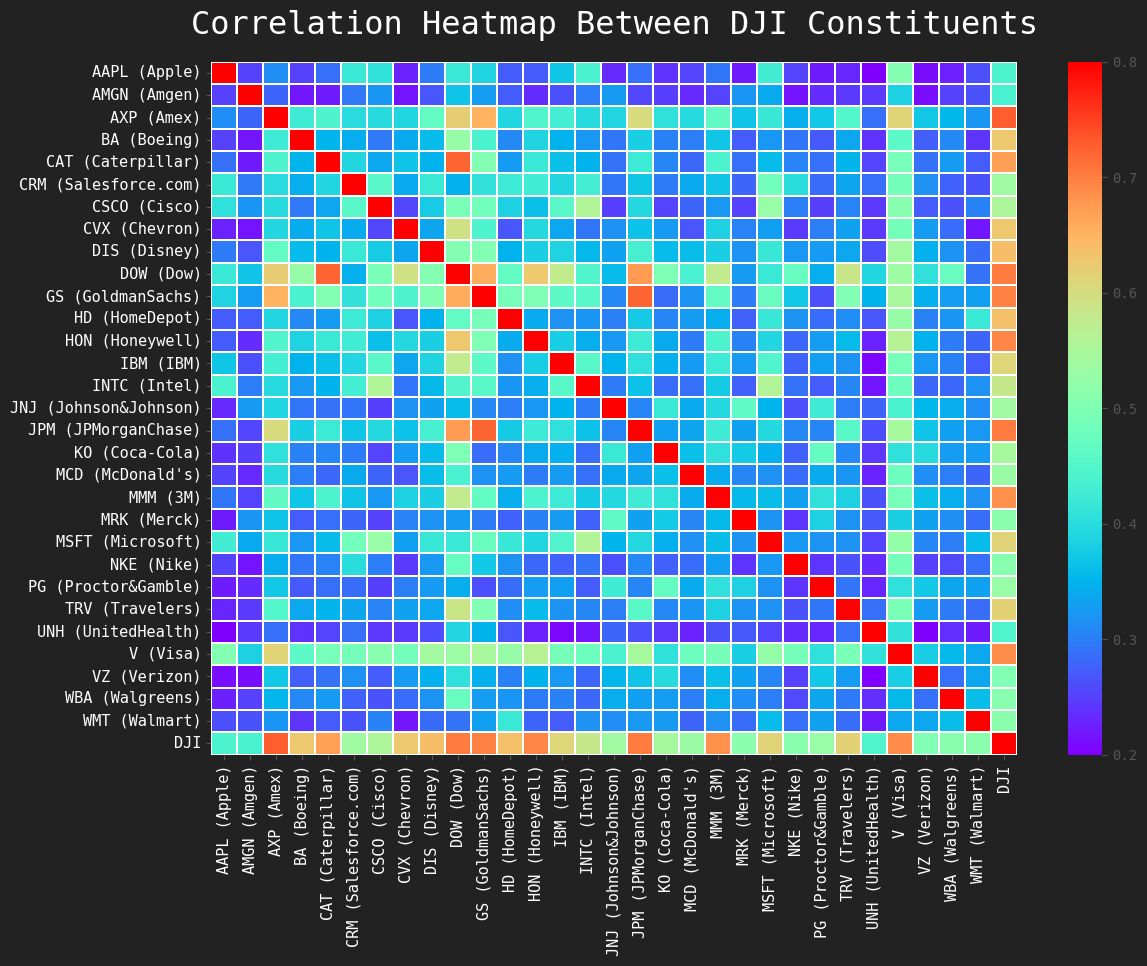

In [46]:
h.correlation_heatmap(constituent_daily_returns, cmap = "rainbow", annot = False, 
                     title = "Correlation Heatmap Between DJI Constituents")

---
## 🔷 **Index Tracking with a Portfolio**
### 👉 **Building an index-tracking portfolio:**
* Choosing years that do not have missing values
* Training / fitting period will be **2011 - 2019**
* Testing period will be **2020 - 2022**
* Dropping DOW, which has troublesome missing values

In [47]:
section_2011_2019 = all_stocks.loc['2011': '2019'].copy()
norm_2011_2019 = section_2011_2019.div(section_2011_2019.iloc[0]).mul(100)
returns_2011_2019 = constituent_daily_returns.loc['2011': '2019'].copy()
diff_returns_2011_2019 = returns_2011_2019.sub(returns_2011_2019.DJI, axis = 0)

### 🔹 **Visualization of all 30 constituents normalized: Training Period 2011-2019**

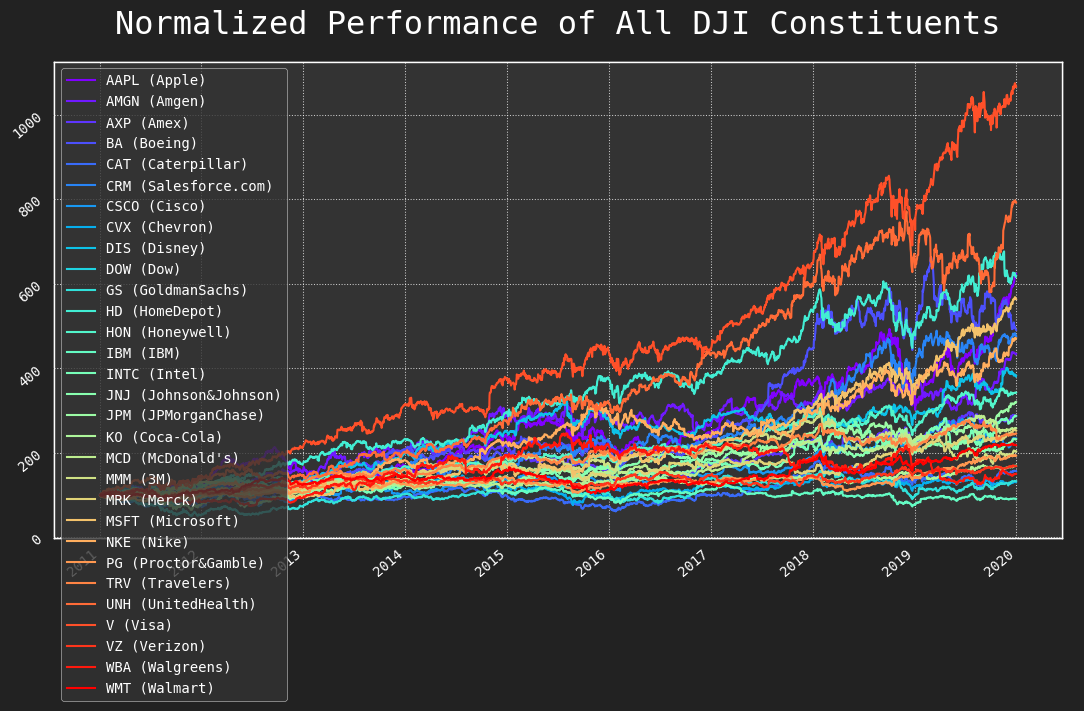

In [48]:
h.fancy_plot(norm_2011_2019.copy().drop(columns = ['DJI']), 
                          title="Normalized Performance of All DJI Constituents", 
                          logy = True, start = '1990', end = '2022',
                          legend_loc = "upper left", cmap = "rainbow")

### 🔹 **Mean and Standard Deviation of the Return Differences**
* `std` is the tracking error, the value to minimize
* choose portfolio by identifying the 8 stocks with the lowest tracking error

In [49]:
diff_returns_2011_2019.agg(['mean', 'std']).T.head(5)

mean   std
AAPL (Apple)       0.001 0.014
AMGN (Amgen)       0.000 0.012
AXP (Amex)         0.000 0.009
BA (Boeing)        0.000 0.011
CAT (Caterpillar) -0.000 0.012

---
## 🔷 **Selecting a Portfolio of 8 Stocks**
* combining steps of calculating the mean and tracking error and annualizing them
* the following function will calculate the mean and standard deviation on a daily basis
* PREMIUM - the annualized average differences
* also will include the tracking error

#### ⚙️ **`annualized_tracking_data()`**

In [50]:
def annualized_tracking_data(returns):
    annualized_summary = returns.agg(['mean', 'std']).T
    annualized_summary['premium'] = annualized_summary['mean'] * 250
    annualized_summary['tracking_error'] = annualized_summary['std'] * np.sqrt(250)
    annualized_summary.drop(columns = ['mean', 'std'], inplace = True)
    return annualized_summary

###  🔹 **`portfolio_list` - Top 8 with lowest tracking error will serve as the portfolio**

<font size = 3><b> **🔗 [`stockhelpers.display_rows()` - GitHub Gist](https://gist.github.com/EvanMarie/db6bd63ec85b831e6a177170ebdc2989)** </b></font>

In [83]:
portfolio_by_tracking= annualized_tracking_data(diff_returns_2011_2019).sort_values(by = "tracking_error")

portfolio_8 = portfolio_by_tracking[0:9]
total_assets = 8
portfolio_list = portfolio_8.sort_values(by = "tracking_error").index[:total_assets +1]

h.display_rows(portfolio_list[1:9], 1, "Tracking Portfolio - 8 Stocks")
h.head2(portfolio_8.iloc[1:9], 8)

........


HON (Honeywell)
MMM (3M)
JNJ (Johnson&Johnson)
TRV (Travelers)
KO (Coca-Cola)
PG (Proctor&Gamble)
MCD (McDonald's)
HD (HomeDepot)

........



### 🔹 **`normalized_pf` - Normalized Portfolio Stocks for Training Period**

In [52]:
normalized_pf = norm_2011_2019.loc[:,portfolio_list]
normalized_pf.head(5)

DJI  HON (Honeywell)  MMM (3M)  JNJ (Johnson&Johnson)  \
Date                                                                   
2011-01-03 100.000          100.000   100.000                100.000   
2011-01-04 100.175           98.653    99.862                100.844   
2011-01-05 100.447          100.295    99.862                100.780   
2011-01-06 100.228          100.277    99.251                100.621   
2011-01-07 100.034          100.166    99.355                 99.650   

            TRV (Travelers)  KO (Coca-Cola)  PG (Proctor&Gamble)  \
Date                                                               
2011-01-03          100.000         100.000              100.000   
2011-01-04           99.552          97.930              100.278   
2011-01-05           98.961          97.347              100.046   
2011-01-06           97.438          96.642               99.876   
2011-01-07           95.539          96.473               99.583   

            MCD (McDonald's)  HD (HomeDepot)  
Date                                          
2011-01-03           100.000         100.000  
2011-01-04            97.010          98.187  
2011-01-05            97.467          97.876  
2011-01-06            96.880          97.479  
2011-01-07            97.089          97.366

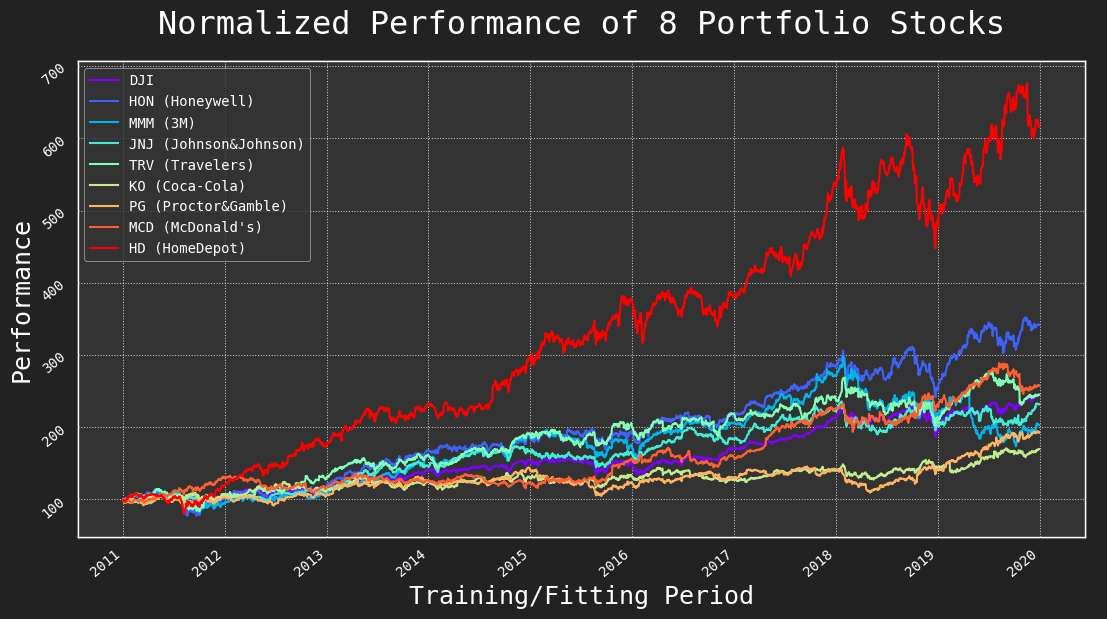

In [53]:
h.fancy_plot(normalized_pf[portfolio_list], legend_loc = 2, 
             xlabel = 'Training/Fitting Period', cmap = 'rainbow',
            ylabel = "Performance", title = "Normalized Performance of 8 Portfolio Stocks")

#### 👉 **Dropping DJI from portfolio list**

In [54]:
portfolio_list = portfolio_list[1:9]

---
## 🔷 **Equal-Weight Tracking Portfolio**
* Step One: creating an equal-weighted portfolio
* In a portfolio with 8 stocks, each will have a weight of 12.5%

<font size = 3><b> **🔗 [`stockhelpers.colorprint()` - GitHub Gist](https://gist.github.com/EvanMarie/c08cc700f1dfaf9c5bb19728c58d2ab7)** </b></font>

In [55]:
equal_weights = np.full(total_assets, 1/total_assets)
h.blueprint("Set of Equal Weights:", 2.5)
h.purpleprint(equal_weights, fontsize = 2.5)

#### 👉 **Applying the equal weights:**
* use `.dot()` to get the weighted average
* this will apply the array of weights to the respective stocks

In [56]:
h.display_me(returns_2011_2019[portfolio_list].dot(equal_weights), 5, "Equal weights applied")

<font size = 3><b> **🔗 [`stockhelpers.portfolio_returns()` - GitHub Gist](https://gist.github.com/EvanMarie/91cefea0c4cd80f706f71a43111d6e28)** </b></font>
* calculates the portfolio returns based on weights
```
def portfolio_returns(weights, portfolio):
    return portfolio.dot(weights)
```

<font size = 3><b> **🔗 [`stockhelpers.tracking_error()` - GitHub Gist](https://gist.github.com/EvanMarie/91cefea0c4cd80f706f71a43111d6e28)** </b></font>
* calculates the tracking error based on the weights array
* first calculates the portfolio returns based on weights with `portfolio_returns()`
* then it subtracts the Dow Jones Index
* then it calculates the standard deviation, i.e. the tracking error, on a daily basis - `.std()`
* then it annualizes the tracking error - `* np.sqrt(250)`
```
def tracking_error(weights, portfolio, index_data):
    result =  portfolio_returns(weights, portfolio).sub(index_data).std() * np.sqrt(250)
    colorprint(f'The annualized tracking error for the portfolio is {(result*100):.2f}%', fontsize = 3)
    return result
```

### **🔹 `portfolio` - the dataframe with the 8 portfolio stocks over the 2011-2019 training time range**

In [57]:
portfolio = returns_2011_2019.loc[:,portfolio_list]
equal_weights_error = h.tracking_error(equal_weights, portfolio, returns_2011_2019.DJI)

### 🔹 **`equal_weight_pf` - Calculating the normalized prices based on the equal weights**
* calculate the cumulative product for each timestamp (each day in range for each stock)
* starting value of 100 for each stock as a baseline price

In [58]:
equal_weight_pf = h.portfolio_returns(equal_weights,
                                          portfolio).add(1).cumprod().mul(100)
h.display_me(equal_weight_pf, 5, "Equally Weighted Portfolio Normalized Prices")

### 🔹 **Adding `equal_weight_pf` as a column to `normalized_pf`**

In [59]:
normalized_pf['equal_weight_pf'] = equal_weight_pf
normalized_pf.iloc[0, -1] = 100
h.display_me(normalized_pf, 5, "Normalized Portfolio with Equal Weight Column")

### 🔹 **Visualizing comparison of `equal_weight_pf` vs DJI**
* Tracking error can be further minimized by optimizing the weights
* That will create a closer match between the two

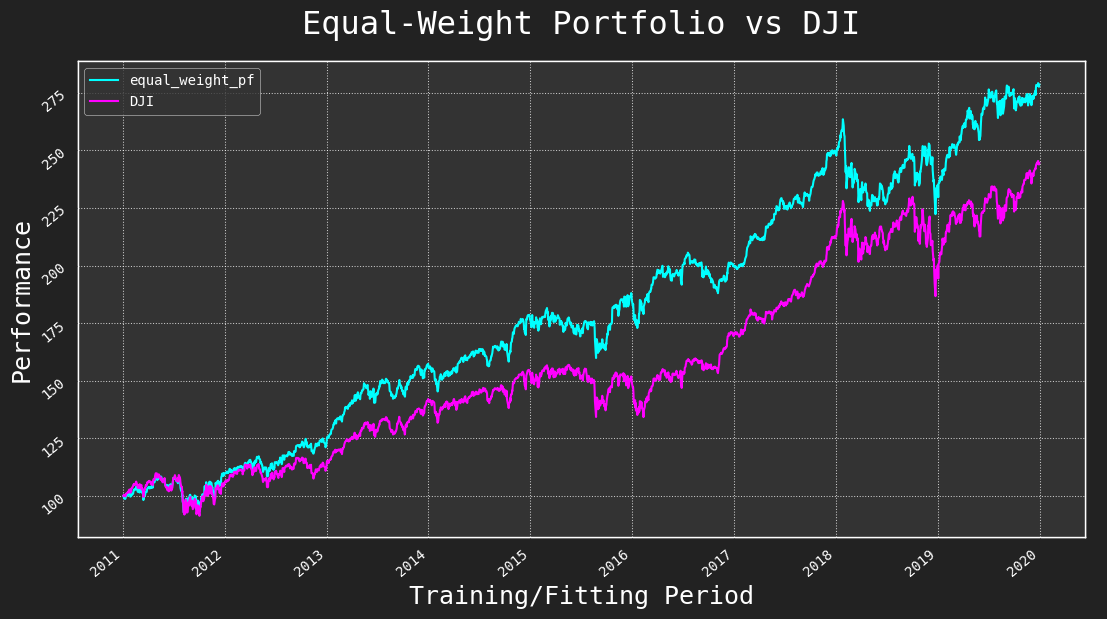

In [60]:
eq_wt_vs_dji_data = normalized_pf[['equal_weight_pf', 'DJI']]

h.fancy_plot(eq_wt_vs_dji_data, legend_loc = 2, 
             xlabel = 'Training/Fitting Period', cmap = 'cool',
            ylabel = "Performance", title = "Equal-Weight Portfolio vs DJI")

---
## 🔷 **Optimizing Portfolio Weights for Better Performance**
* minimizing tracking error
* using a quadratic optimization algorithm from `scipy`
* **[`scipy.optimize.minimize()`[[docs]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)**
```
SciPy optimize provides functions for minimizing (or maximizing) objective functions, possibly subject to constraints. It includes solvers for nonlinear problems (with support for both local and global optimization algorithms), linear programing, constrained and nonlinear least-squares, root finding, and curve fitting.
```

#### ⚙️ **[`scipy.optimize.minimize()`[docs]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)**
* Constraint: weights must sum to 1, and sum of weights minus 1 must equal 0
* Bound: limits all weights to be between 0 and 1, not allowing for short selling (which can be changed)
* Opts: takes constraint and bound, optimizing based on function to be minimized, starting with equal weights

In [61]:
import scipy.optimize as sco

In [62]:
def pf_returns(weights):
    return portfolio.dot(weights)

def optimization_tracking(weights):
    result =  pf_returns(weights).sub(returns_2011_2019.DJI).std() * np.sqrt(252)
    return result

constraint = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})
print("constraint: ", constraint, '\n')

bound =  tuple((0,1) for x in range(total_assets))
print("bounds: ", bound, '\n')

# optimization_tracking is the function to minimize
# equal_weights is the starting point
# the method is a quadratic optimization
optimizer = sco.minimize(optimization_tracking, equal_weights, method = "SLSQP", bounds = bound, constraints = constraint)
display(optimizer)
print('')

constraint:  {'type': 'eq', 'fun': <function <lambda> at 0x7fdb21b46940>} 

bounds:  ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)) 



     fun: 0.0523514837155963
     jac: array([0.01478375, 0.01494329, 0.01514164, 0.01472849, 0.01510627,
       0.01469234, 0.01505356, 0.01447382])
 message: 'Optimization terminated successfully'
    nfev: 63
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.20302073, 0.18354938, 0.13131177, 0.12294698, 0.04559298,
       0.0822182 , 0.09445817, 0.13690179])

### ⬆️ Optimizer Attribute Values:
* `fun: 0.0523514837155963` - the annualized tracking error of the optimized portfolio, which is better than the equally weighted portfolio
* `x: array([0.20302073, 0.18354938, 0.13131177, 0.12294698, 0.04559298,
       0.0822182 , 0.09445817, 0.13690179])` - the array of the optimal weights 

In [63]:
optimal_weights = optimizer['x']
h.highlight(f'Optimal weights: {optimal_weights}', 'yellow', 'black', 2)

In [64]:
h.highlight('\nOptimal weight for each constituent in the portfolio:', 'yellow', 'black', 3)
optimal_weight_data = pd.Series(index = portfolio_list, data = optimal_weights)
display(optimal_weight_data)

HON (Honeywell)         0.203
MMM (3M)                0.184
JNJ (Johnson&Johnson)   0.131
TRV (Travelers)         0.123
KO (Coca-Cola)          0.046
PG (Proctor&Gamble)     0.082
MCD (McDonald's)        0.094
HD (HomeDepot)          0.137
dtype: float64

### 🔹 **`optimal_weight_pf` - Calculating the normalized prices based on the optimal weights**

In [65]:
optimal_pf = h.portfolio_returns(optimal_weights, portfolio)[1:].add(1).cumprod().mul(100)
h.display_me(optimal_pf, 5, "Optimal Portfolio Returns (Normalized)")

### 🔹 **Adding `optimal_weight_pf` as a column to `normalized_pf`**

In [66]:
normalized_pf['optimal_weight_pf'] = optimal_pf
normalized_pf.iloc[0, -1] = 100
h.display_me(normalized_pf, 5, "Normalized Training Portfolio with Optimal Weight Portfolio Column")

### 🔹 **Visualizing comparison of `optimal_weight_pf` vs DJI**

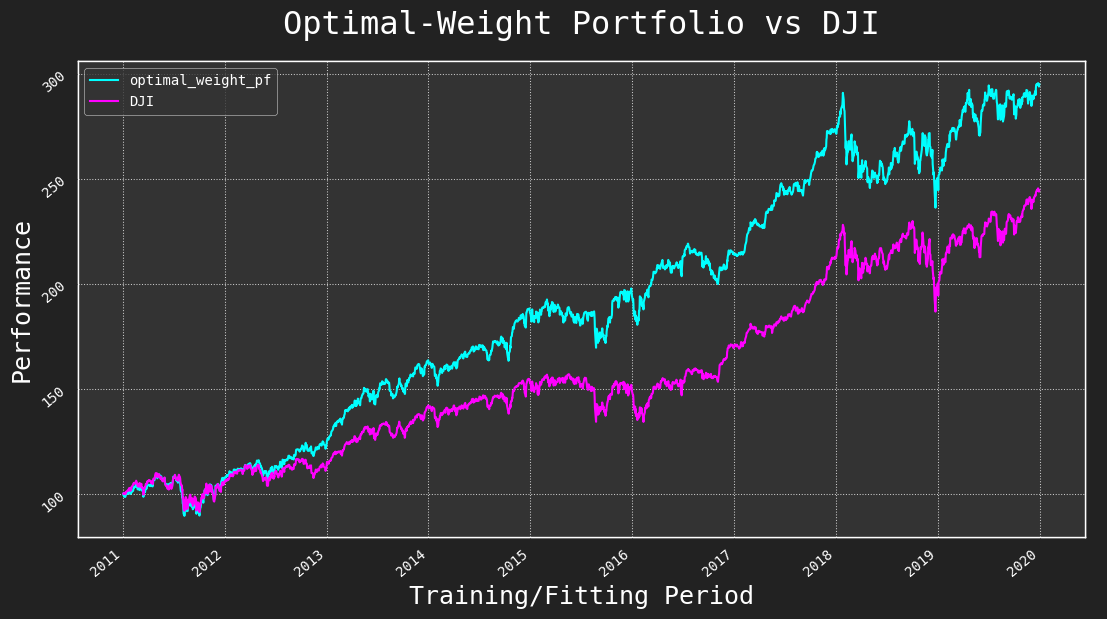

In [67]:
opt_wt_vs_dji_data = pd.concat([normalized_pf.optimal_weight_pf, 
                               norm_2011_2019.DJI], axis = 1)

h.fancy_plot(opt_wt_vs_dji_data, legend_loc = 2, 
             xlabel = 'Training/Fitting Period', cmap = 'cool',
            ylabel = "Performance", title = "Optimal-Weight Portfolio vs DJI")

### 🔹 **Equal-Weight vs Optimized-Weight Portfolio**

In [68]:
annualized_tracking_data(normalized_pf[['equal_weight_pf', 
                                           'optimal_weight_pf', 'DJI']].pct_change())

premium  tracking_error
equal_weight_pf      0.121           0.124
optimal_weight_pf    0.128           0.133
DJI                  0.108           0.138

In [69]:
annualized_tracking_data(normalized_pf[['equal_weight_pf', 
                                           'optimal_weight_pf', 'DJI']])

premium  tracking_error
equal_weight_pf   45,058.827         834.834
optimal_weight_pf 47,503.420         956.962
DJI               39,369.814         656.221

---
## 🔷 **Forward-Testing**
* The portfolio has been fitted to the data for 2011-2019
* The testing period will be 2020-2022

### **PLAN:**
* automate and scale the process of calculating tracking errors
* visualize the tracking portfolios and index

<font size = 3><b> **🔗 [`stockhelpers.tracking_error_general()` - GitHub Gist](https://gist.github.com/EvanMarie/91cefea0c4cd80f706f71a43111d6e28)** </b></font>
* takes data
* list of tracking stocks
* array of weights
* index or individual stock to track against
* start date and end date of the range

Returns the annualized tracking error between the tracking stocks, the weights, and the index in the period from start to end.

```
def tracking_error_general(data, portfolio_list, weights, 
                           index, start, end, title = None,
                           printout=True):
    
    results = data.loc[start:end, portfolio_list].dot(weights).\
                sub(data.loc[start:end, index]).std() * np.sqrt(250)
    if printout is True:
        highlight(title, 'yellow', 'black', 2)
        highlight(f'Period: {start} to {end}', 'yellow', 'black', 2)
        highlight(f'Overall tracking error: {(results *100): .2f}%', 'yellow', 'black', 2)
    else:
        return results
```

#### 👉 **Tracking error for training range: 2011-2019**

In [70]:
h.tracking_error_general(constituent_daily_returns, portfolio_list, 
                       equal_weights, "DJI", "2011", "2019", 
                       title = "Training Range: Equal Weights", printout = True)

In [71]:
h.tracking_error_general(constituent_daily_returns, portfolio_list, 
                       optimal_weights, "DJI", "2011", "2019", 
                       title = "Training Range: Optimal Weights", printout = True)

---
## 🔷 **Forward Testing: Tracking error for testing range: 2020-2022**

In [72]:
h.tracking_error_general(constituent_daily_returns, portfolio_list, 
                       equal_weights, "DJI", "2020", "2022", 
                       title = "Testing Range: Equal Weights", printout = True)

In [73]:
forward_tracking_error = h.tracking_error_general(constituent_daily_returns, 
                        portfolio_list, optimal_weights, "DJI", "2020", "2022", 
                       title = "Testing Range: Optimal Weights", printout=False)

h.tracking_error_general(constituent_daily_returns, portfolio_list, 
                       optimal_weights, "DJI", "2020", "2022", 
                       title = "Testing Range: Optimal Weights", printout = True)

<font size = 3><b> **🔗 [`stockhelpers.visualize_tracking()` - GitHub Gist](https://gist.github.com/EvanMarie/faea31daf45372a6a026ea3c7ac1c86a)** </b></font>
* takes data
* stock list
* weights
* index or stock to track against
* start and end for the range

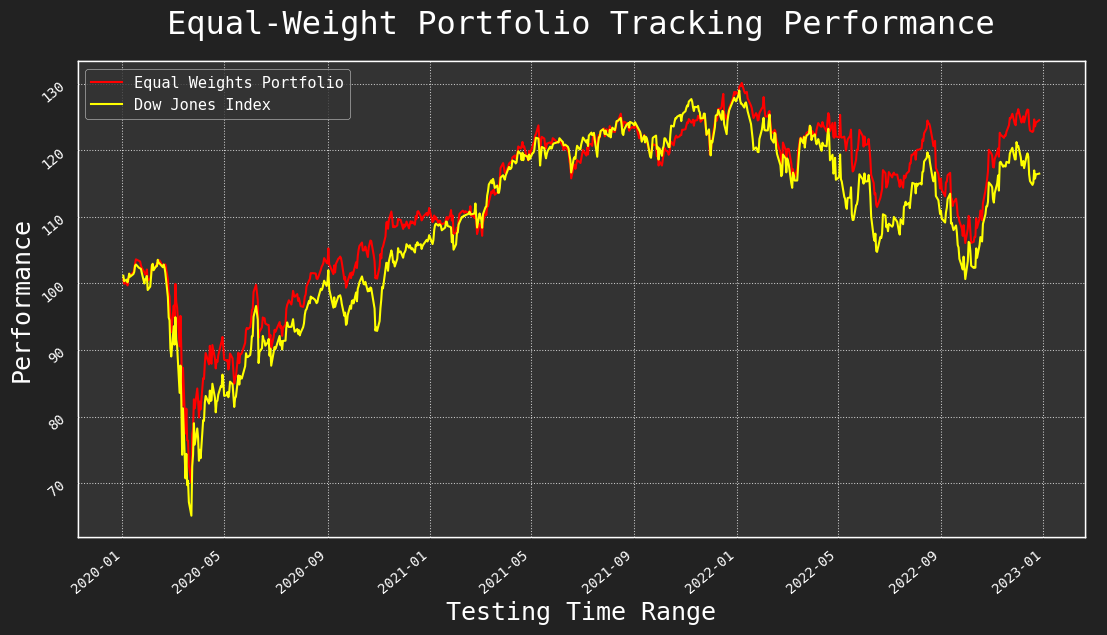

In [74]:
h.visualize_tracking(constituent_daily_returns, portfolio_list, equal_weights,
         'DJI', '2020', '2022', title="Equal-Weight Portfolio Tracking Performance", 
          legend_loc = 2, legend_labels = ['Equal Weights Portfolio', 
                                           'Dow Jones Index'], color1='red', 
                                            color2 = 'yellow', 
                                            xlabel = 'Testing Time Range', 
                                            ylabel = 'Performance')

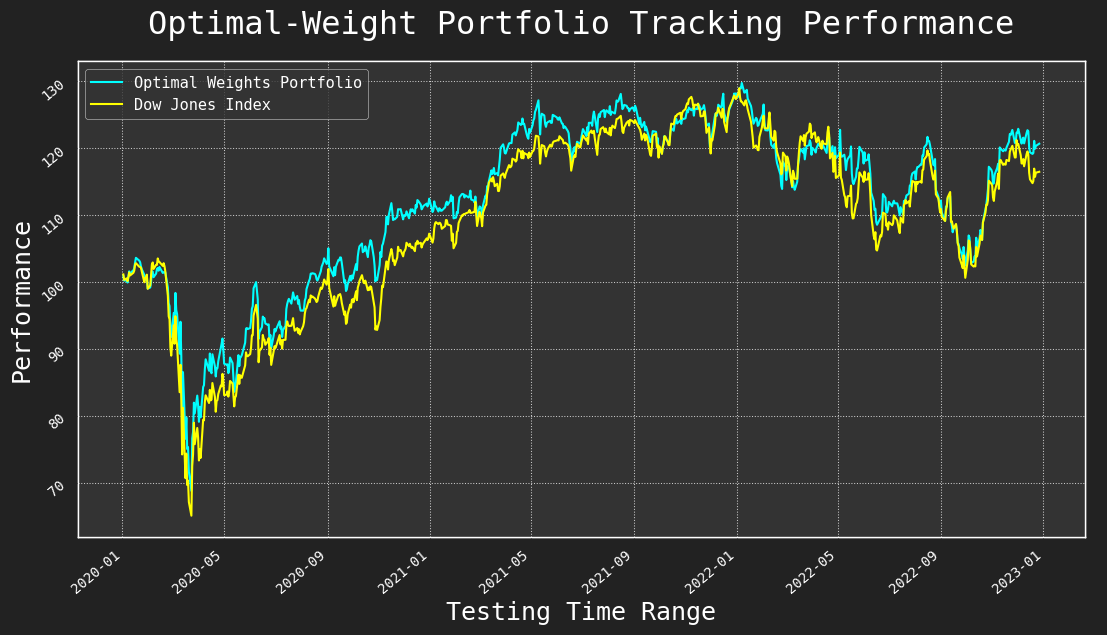

In [75]:
h.visualize_tracking(constituent_daily_returns, portfolio_list, optimal_weights,
         'DJI', '2020', '2022', title="Optimal-Weight Portfolio Tracking Performance", 
          legend_loc = 2, legend_labels = ['Optimal Weights Portfolio', 
                                    'Dow Jones Index'], color1 = 'cyan',
                                    color2 = 'yellow', xlabel = 'Testing Time Range', 
                                    ylabel = 'Performance')

---
## 🔷 **Optimzed vs Random Portfolio Comparison**
* Optimized portfolio compared to the averaged results of 25,000 random portfolios
* Random portfolio = choosing random stocks and using random weights
* Dropping DOW, because the data is not complete for 2019
* Dropping the index, because it will not be used

#### 👉 **Stock list to choose 8 random stocks from**

In [76]:
stocks = all_stocks.columns.drop(["DJI"])
stocks = (list(stocks[0:-5]))

In [77]:
h.display_rows(stocks, 1, "Stocks to randomly choose from")

........


AAPL (Apple)
AMGN (Amgen)
AXP (Amex)
BA (Boeing)
CAT (Caterpillar)
CRM (Salesforce.com)
CSCO (Cisco)
CVX (Chevron)
DIS (Disney)
DOW (Dow)
GS (GoldmanSachs)
HD (HomeDepot)
HON (Honeywell)
IBM (IBM)
INTC (Intel)
JNJ (Johnson&Johnson)
JPM (JPMorganChase)
KO (Coca-Cola)
MCD (McDonald's)
MMM (3M)
MRK (Merck)
MSFT (Microsoft)
NKE (Nike)
PG (Proctor&Gamble)
TRV (Travelers)

........



### 🔹 **25,000 Random Porfolios Put to the Test**
* creating 25,000 random portfolios
* calculating 25,000 tracking errors

In [78]:
np.random.seed(123)
random_stocks = np.random.choice(stocks, size = total_assets, replace = False)
h.display_rows(random_stocks, 1, "8 Random Stocks")

........


CRM (Salesforce.com)
MSFT (Microsoft)
NKE (Nike)
MCD (McDonald's)
JNJ (Johnson&Johnson)
DIS (Disney)
CVX (Chevron)
HD (HomeDepot)

........



### 🔹 **8 random weights for the 8 stocks**
* `random.random()` returns the specified number of random floats
* dividing by the sum makes sure that all weights together sum to 1

In [79]:
random_numbers = np.random.random(total_assets)
random_weights = random_numbers / random_numbers.sum()
random_weights
h.highlight('\nRandom constituents and their respective random weights:', 'yellow', 'black', 2.5)
random_weight_data = pd.Series(index = random_stocks, data = random_weights)
display(random_weight_data)

CRM (Salesforce.com)    0.108
MSFT (Microsoft)        0.108
NKE (Nike)              0.129
MCD (McDonald's)        0.172
JNJ (Johnson&Johnson)   0.147
DIS (Disney)            0.124
CVX (Chevron)           0.147
HD (HomeDepot)          0.066
dtype: float64

<font size = 3><b> **🔗 [`stockhelpers.random_portfolios()` - GitHub Gist](https://gist.github.com/EvanMarie/7b9b5719941f02de31275242a1dc98f6)** </b></font>
* takes a number of random portfolios to be created, calculated for tracking error, which is then averaged
* the averaged tracking error of the multiple random portfolios will be compared to the optimal-weight portfolio of 8 specifically chosen stocks

```
def random_portfolios(num_portfolios, total_assets,
                      returns_df, stocks_list, seed = 123):
    np.random.seed(seed)
    random_error_collection = np.empty(25000)
    random_stocks = np.random.choice(stocks_list, size = total_assets, replace = False)
    for i in range(25000):
        random_numbers = np.random.random(total_assets)
        random_weights = random_numbers / random_numbers.sum()
        random_stock = np.random.choice(stocks_list, size = total_assets, replace = False)

        random_error_collection[i] = \
                                    tracking_error_general(returns_df,
                                                             random_stocks,
                                                             random_weights,
                                                             'DJI', '2020', 
                                                             '2022', 
                                                              printout = False)
    return random_error_collection
```

In [80]:
random_errors = h.random_portfolios(25000, 8, returns_df = constituent_daily_returns,
                                    stocks_list = stocks, seed = 123)

<font size = 3><b> **🔗 [`stockhelpers.compare_random_optimized()` - GitHub Gist](https://gist.github.com/EvanMarie/eee4d7a4f694a91e18e4eff694788da1)** </b></font>
* this returns the comparison of the random portfolios to the 8 chosen stocks with optimized weights
* it will also plot the distribution of the tracking errors across all random portfolios and random respective weights

<font size = 3><b> **🔗 [`stockhelpers.distro_histo()` - GitHub Gist](https://gist.github.com/EvanMarie/e39b0feaff2f46c41ba49e628bab9c54)** </b></font>

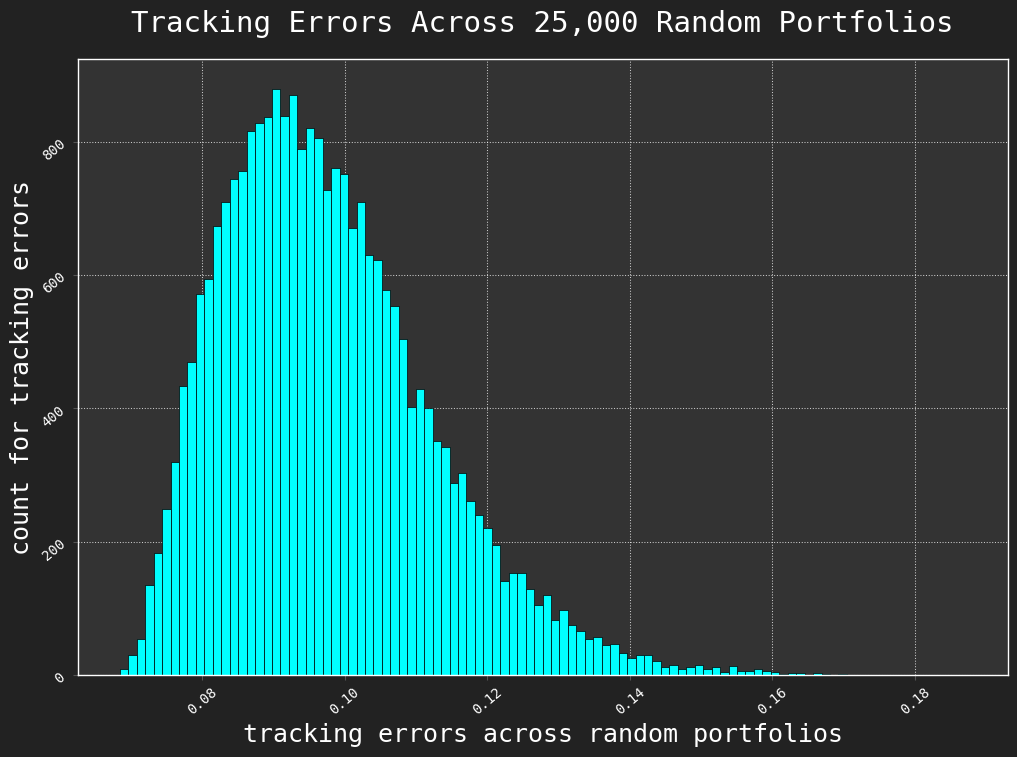

In [81]:
h.compare_random_optimized(random_errors, forward_tracking_error, num_portfolios=25000)